In [190]:

#importing the libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,classification_report
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [191]:
#loading the data set
df_train= pd.read_csv('train.csv')
df_train.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0  127         120       RL  ...        WD         Normal    128000
1  889          20       RL  ...        WD         Normal    268000
2  793          60       RL  ...        WD         Normal    269790
3  110          20       RL  ...       COD         Normal    190000
4  422          20       RL  ...        WD         Normal    215000

[5 rows x 81 columns]

In [192]:
df_test= pd.read_csv('test.csv')
df_test.head()

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0   337          20       RL  ...    2007        WD        Normal
1  1018         120       RL  ...    2009       COD       Abnorml
2   929          20       RL  ...    2009        WD        Normal
3  1148          70       RL  ...    2009        WD        Normal
4  1227          60       RL  ...    2008        WD        Normal

[5 rows x 80 columns]

In [193]:
df_test.shape

(292, 80)

In [194]:
df_train.shape

(1168, 81)

In [195]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [196]:
df_test.isnull().sum().head(50)

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
Street            0
Alley           278
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        1
MasVnrArea        1
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          7
BsmtCond          7
BsmtExposure      7
BsmtFinType1      7
BsmtFinSF1        0
BsmtFinType2      7
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


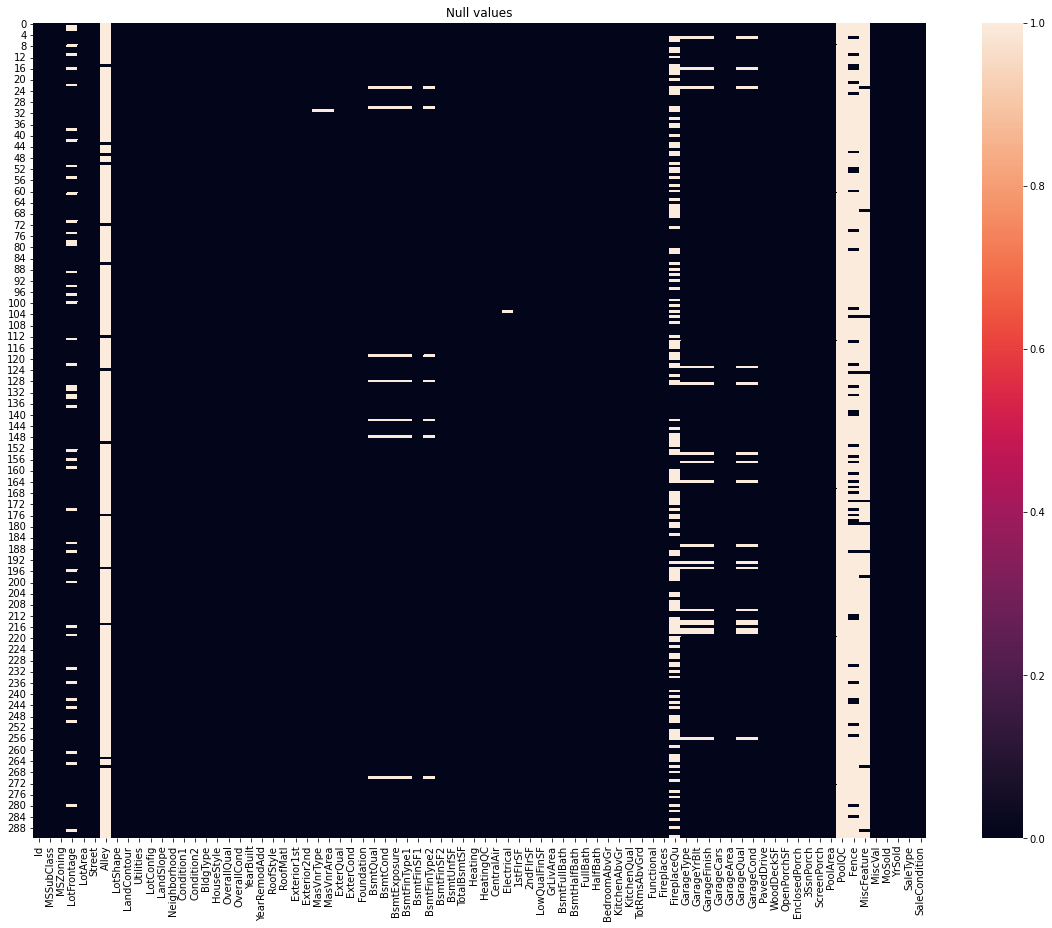

In [197]:
#Heat map to check the null values
plt.figure(figsize=[20,15])
sns.heatmap(df_test.isnull())
plt.title('Null values')
plt.show()

In [198]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

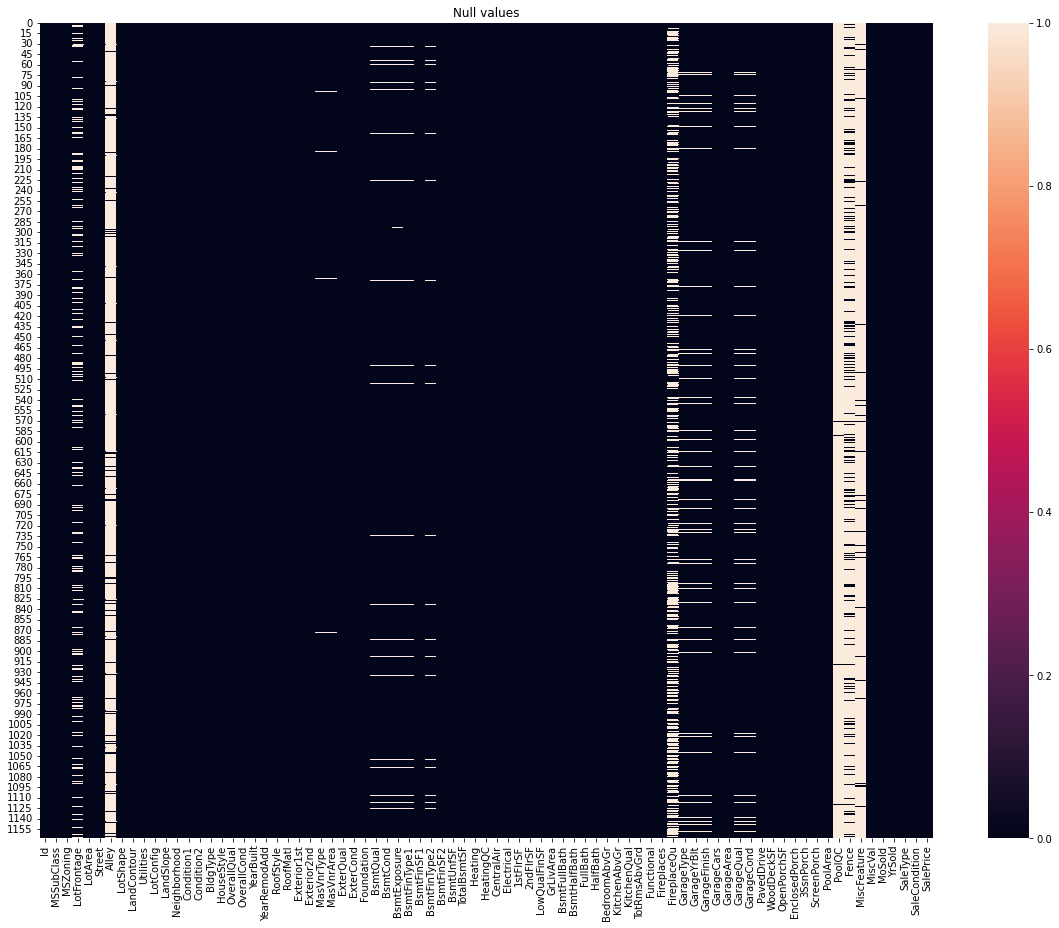

In [199]:
#Heat map to check the null values
plt.figure(figsize=[20,15])
sns.heatmap(df_train.isnull())
plt.title('Null values')
plt.show()

In [200]:
#Missing Data values 
"""
LotFrontage      214
Alley           1091
MasVnrType         7
MasVnrArea         7
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
FireplaceQu       551
GarageType         64
GarageYrBlt        64
GarageFinish       64
GarageQual         64
GarageCond         64
PoolQC           1161
Fence             931
MiscFeature      1124"""

'\nLotFrontage      214\nAlley           1091\nMasVnrType         7\nMasVnrArea         7\nBsmtQual          30\nBsmtCond          30\nBsmtExposure      31\nBsmtFinType1      30\nBsmtFinType2      31\nFireplaceQu       551\nGarageType         64\nGarageYrBlt        64\nGarageFinish       64\nGarageQual         64\nGarageCond         64\nPoolQC           1161\nFence             931\nMiscFeature      1124'

**Handeling the missing data**

In [201]:
#filling the missing values 
#LotFrontage
mean_value =df_train['LotFrontage'].mean()
df_train['LotFrontage'].fillna(value=mean_value, inplace=True)

mean_value =df_test['LotFrontage'].mean()
df_test['LotFrontage'].fillna(value=mean_value, inplace=True)



In [202]:
# filling the missing value by mode
mode_value =df_train['Alley'].mode()
df_train['Alley'].fillna('None', inplace=True)
mode_value

mode_value =df_test['Alley'].mode()
df_test['Alley'].fillna('None', inplace=True)

In [203]:
# filling the missing value by mode
print(df_train['MasVnrType'].mode())
df_train['MasVnrType'].fillna('None', inplace=True)

df_test['MasVnrType'].fillna('None', inplace=True)


0    None
dtype: object


In [204]:
#MasVnrArea
mean_value1 =df_train['MasVnrArea'].mean()
df_train['MasVnrArea'].fillna(value=mean_value1, inplace=True)

mean_value1 =df_test['MasVnrArea'].mean()
df_test['MasVnrArea'].fillna(value=mean_value1, inplace=True)


In [205]:
#BsmtQual
# filling the missing value with none 
print(df_train['BsmtQual'].mode())
df_train['BsmtQual'].fillna('None', inplace=True)

df_test['BsmtQual'].fillna('None', inplace=True)


0    TA
dtype: object


In [206]:
#BsmtCond
# filling the missing value with none 
print(df_train['BsmtCond'].mode())
df_train['BsmtCond'].fillna('None', inplace=True)

df_test['BsmtCond'].fillna('None', inplace=True)

0    TA
dtype: object


In [207]:
# filling the missing value with mode 
print(df_test['Electrical'].mode())


0    SBrkr
dtype: object


In [208]:
df_test['Electrical'].fillna('SBrkr', inplace=True)

In [209]:
#BsmtExposure
# filling the missing value 
print(df_train['BsmtExposure'].mode())
df_train['BsmtExposure'].fillna('None', inplace=True)

df_test['BsmtExposure'].fillna('None', inplace=True)

0    No
dtype: object


In [210]:
#BsmtFinType1
# filling the missing value 
print(df_train['BsmtFinType1'].mode())
df_train['BsmtFinType1'].fillna('None', inplace=True)

df_test['BsmtFinType1'].fillna('None', inplace=True)

0    Unf
dtype: object


In [211]:
#BsmtFinType2
# filling the missing value by mode
print(df_train['BsmtFinType2'].mode())
df_train['BsmtFinType2'].fillna('None', inplace=True)

df_test['BsmtFinType2'].fillna('None', inplace=True)

0    Unf
dtype: object


In [212]:
#FireplaceQu
# filling the missing value
print(df_train['FireplaceQu'].mode())
df_train['FireplaceQu'].fillna('None', inplace=True)

df_test['FireplaceQu'].fillna('None', inplace=True)

0    Gd
dtype: object


In [213]:
#GarageType
# filling the missing value 
print(df_train['GarageType'].mode())
df_train['GarageType'].fillna('None', inplace=True)

df_test['GarageType'].fillna('None', inplace=True)

0    Attchd
dtype: object


In [214]:
#GarageYrBlt
mean_value2 =df_train['GarageYrBlt'].mean()
df_train['GarageYrBlt'].fillna(value=mean_value2, inplace=True)

mean_value2 =df_test['GarageYrBlt'].mean()
df_test['GarageYrBlt'].fillna(value=mean_value2, inplace=True)

mean_value2

1979.76

In [215]:
#GarageFinish
print(df_train['GarageFinish'].mode())
df_train['GarageFinish'].fillna('None', inplace=True)

df_test['GarageFinish'].fillna('None', inplace=True)

0    Unf
dtype: object


In [216]:
#GarageQual
print(df_train['GarageQual'].mode())
df_train['GarageQual'].fillna('None', inplace=True)

df_test['GarageQual'].fillna('None', inplace=True)

0    TA
dtype: object


In [217]:
#GarageCond
print(df_train['GarageCond'].mode())
df_train['GarageCond'].fillna('None', inplace=True)

df_test['GarageCond'].fillna('None', inplace=True)


0    TA
dtype: object


In [218]:
#PoolQC
print(df_train['PoolQC'].mode())
df_train['PoolQC'].fillna('None', inplace=True)

df_test['PoolQC'].fillna('None', inplace=True)

0    Gd
dtype: object


In [219]:
#Fence
print(df_train['Fence'].mode())
df_train['Fence'].fillna('None', inplace=True)

df_test['Fence'].fillna('None', inplace=True)

0    MnPrv
dtype: object


In [220]:
#MiscFeature
print(df_train['MiscFeature'].mode())
df_train['MiscFeature'].fillna('None', inplace=True)

df_test['MiscFeature'].fillna('None', inplace=True)

0    Shed
dtype: object


In [221]:
#Alley
df_train['MiscFeature'].fillna('None', inplace=True)

df_test['MiscFeature'].fillna('None', inplace=True)

**Exploratory data Analysis**

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


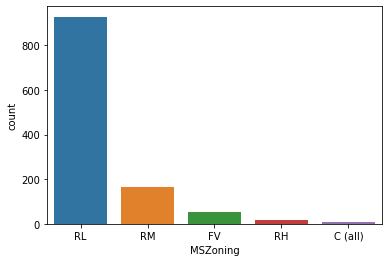

In [222]:
sns.countplot(df_train['MSZoning'])
print(df_train['MSZoning'].value_counts())
plt.show()

Descrpition: Highest number of hosues sale Identifies the general zoning classification of the sale "Residential Low Density" 

Pave    1164
Grvl       4
Name: Street, dtype: int64


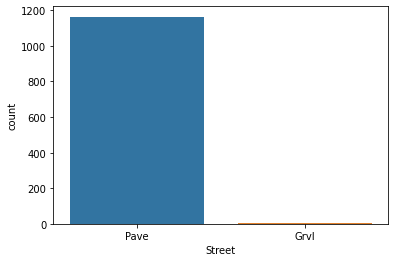

In [223]:
sns.countplot(df_train['Street'])
print(df_train['Street'].value_counts())
plt.show()

Observation:the most of the houses have paved street access 

None    1091
Grvl      41
Pave      36
Name: Alley, dtype: int64


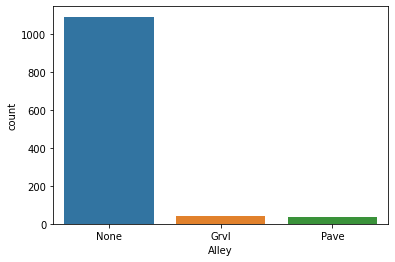

In [224]:
sns.countplot(df_train['Alley'])
print(df_train['Alley'].value_counts())
plt.show()

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


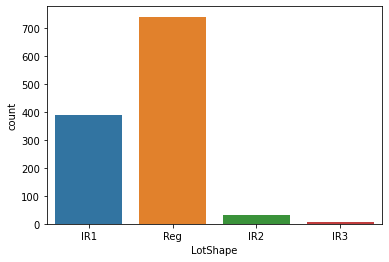

In [225]:
sns.countplot(df_train['LotShape'])
print(df_train['LotShape'].value_counts())
plt.show()

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


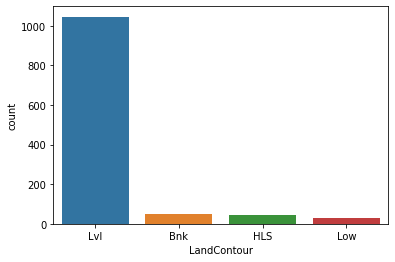

In [226]:
sns.countplot(df_train['LandContour'])
print(df_train['LandContour'].value_counts())
plt.show()

AllPub    1168
Name: Utilities, dtype: int64


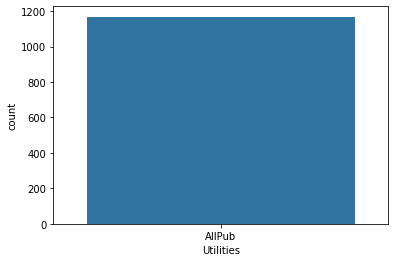

In [227]:
sns.countplot(df_train['Utilities'])
print(df_train['Utilities'].value_counts())
plt.show()

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


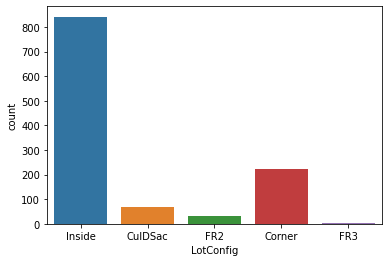

In [228]:
sns.countplot(df_train['LotConfig'])
print(df_train['LotConfig'].value_counts())
plt.show()

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


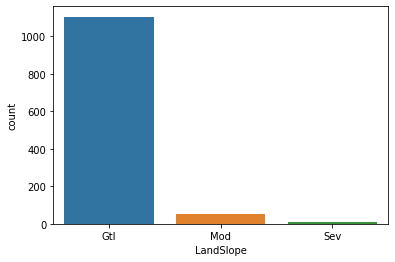

In [229]:
#LandSlope
sns.countplot(df_train['LandSlope'])
print(df_train['LandSlope'].value_counts())
plt.show()

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64


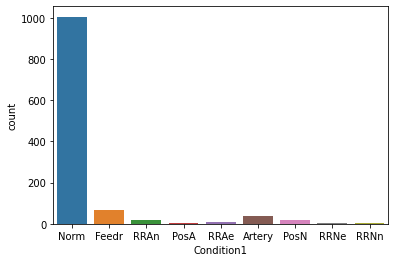

In [230]:
#Condition1
sns.countplot(df_train['Condition1'])
print(df_train['Condition1'].value_counts())
plt.show()

Observation: Most of the hosuses Proximity to various conditions is normal 

Norm      1154
Feedr        6
Artery       2
PosN         2
RRAe         1
RRNn         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64


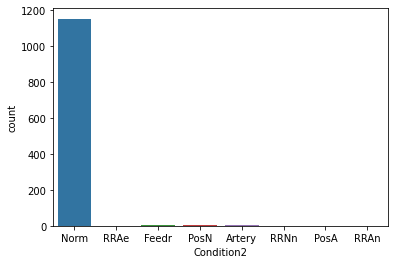

In [231]:
#Condition2
sns.countplot(df_train['Condition2'])
print(df_train['Condition2'].value_counts())
plt.show()

Observation: Most of the hosuses Proximity to various conditions is normal 

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64


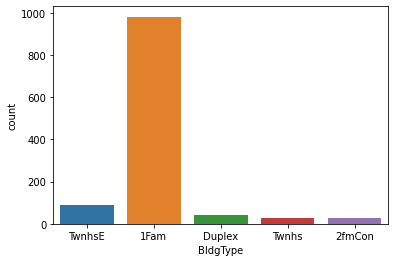

In [232]:
#BldgType
sns.countplot(df_train['BldgType'])
print(df_train['BldgType'].value_counts())
plt.show()

Observation: highest number of houses Single-family Detached Type of dwelling

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64


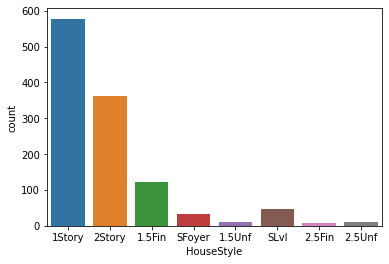

In [233]:
#HouseStyle
sns.countplot(df_train['HouseStyle'])
print(df_train['HouseStyle'].value_counts())
plt.show()

Observation: Highes number of house are one sotry style 

5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64


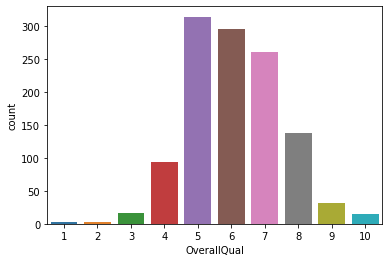

In [234]:
#OverallQual
sns.countplot(df_train['OverallQual'])
print(df_train['OverallQual'].value_counts())
plt.show()

Observation:Highest number of houses over all quality rating is 5(average) out of 10 

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor




5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1      1
Name: OverallCond, dtype: int64


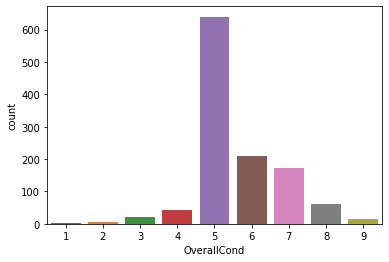

In [235]:
#OverallCond
sns.countplot(df_train['OverallCond'])
print(df_train['OverallCond'].value_counts())
plt.show()

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


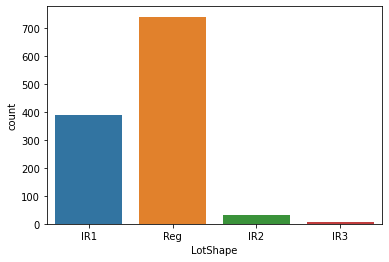

In [236]:
#LotShape
sns.countplot(df_train['LotShape'])
print(df_train['LotShape'].value_counts())
plt.show()

Observation: Highest number of house General shape of property is Regular

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


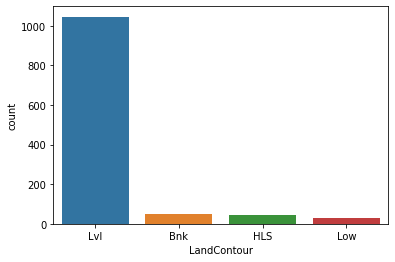

In [237]:
#LandContour #Flatness of the property
sns.countplot(df_train['LandContour'])
print(df_train['LandContour'].value_counts())
plt.show()

more area of the property is Flatness

In [238]:
df_train.head(1)

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0  127         120       RL  ...        WD         Normal    128000

[1 rows x 81 columns]

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64


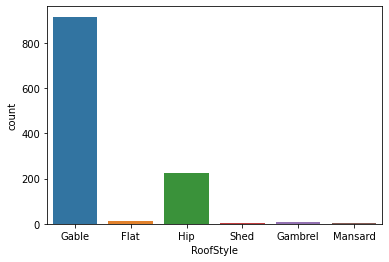

In [239]:
#RoofStyle
sns.countplot(df_train['RoofStyle'])
print(df_train['RoofStyle'].value_counts())
plt.show()

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Metal         1
ClyTile       1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64


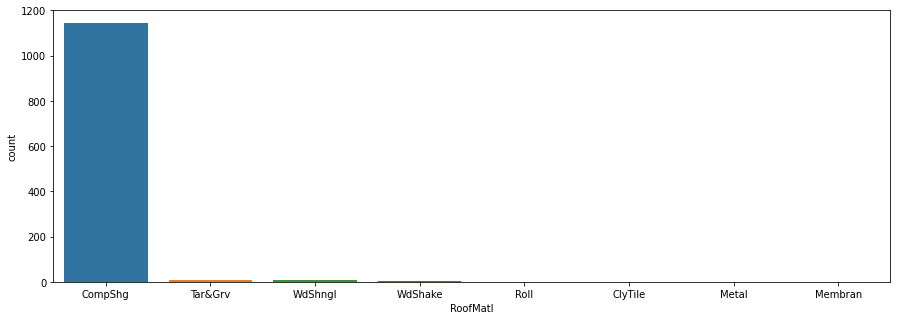

In [240]:
#RoofMatl
fig =plt.figure(figsize=(15,5))
sns.countplot(df_train['RoofMatl'])
print(df_train['RoofMatl'].value_counts())
plt.show()

In [241]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [242]:
column=['MSZoning','Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2',  'Heating',
       'HeatingQC', 'CentralAir', 'Electrical','LowQualFinSF',  'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'SaleType',
       'SaleCondition']

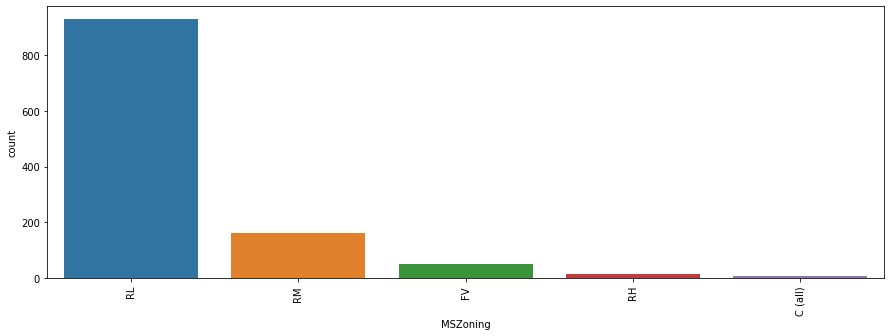

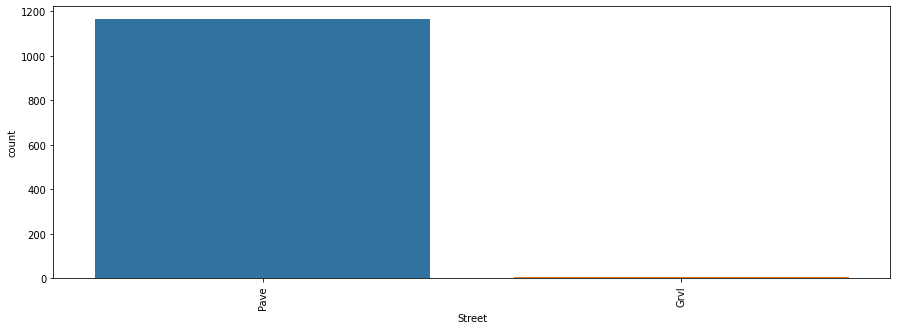

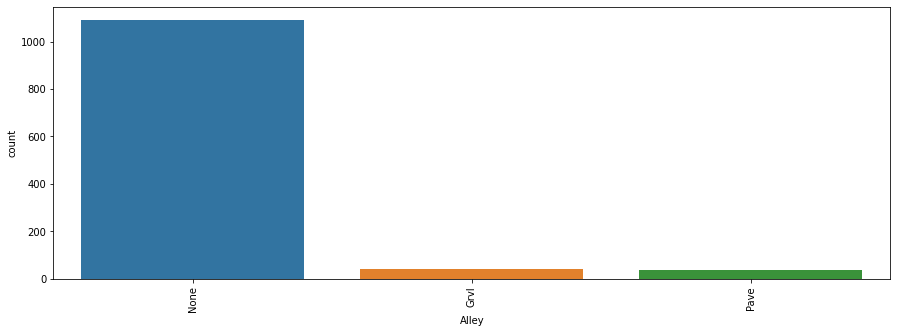

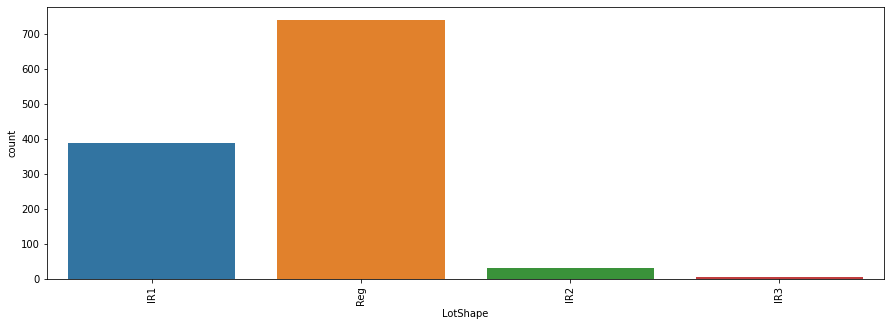

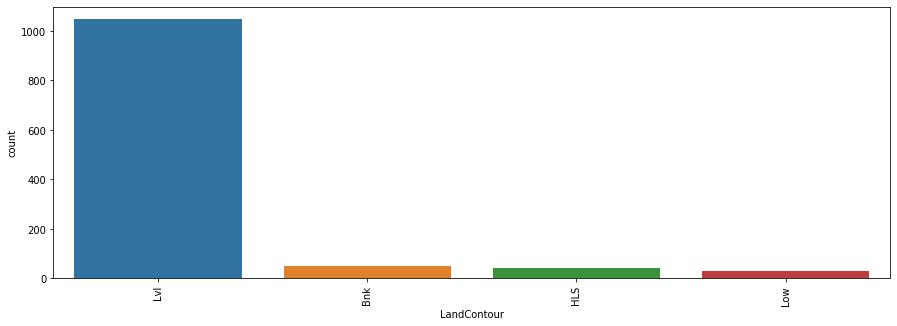

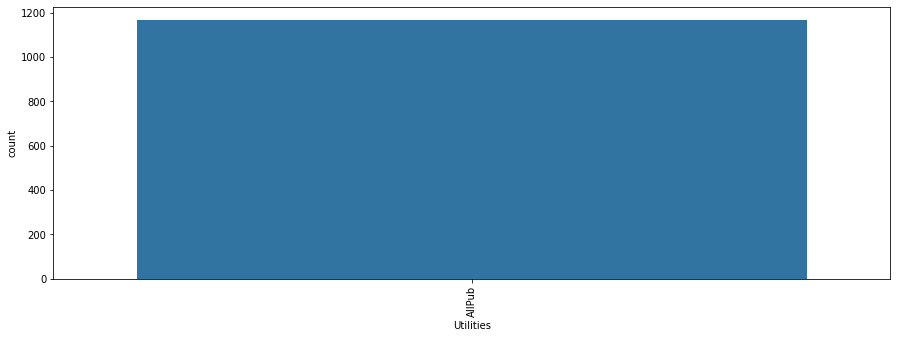

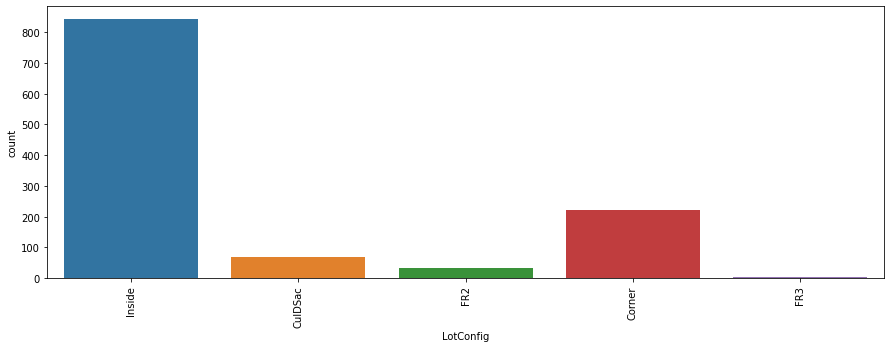

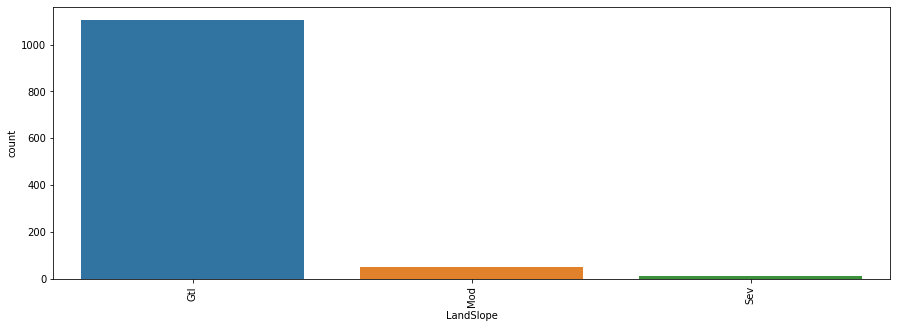

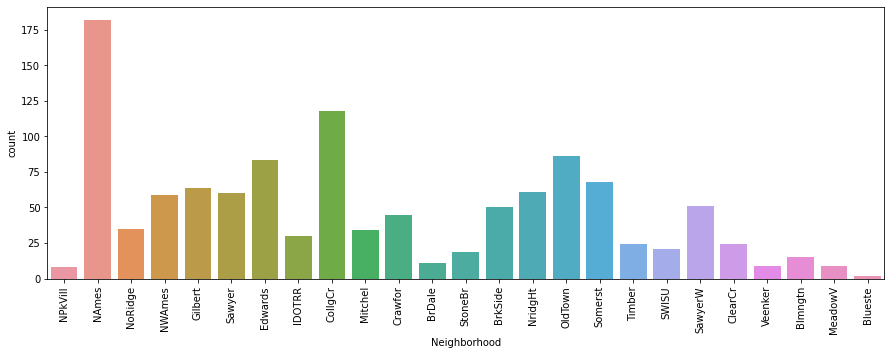

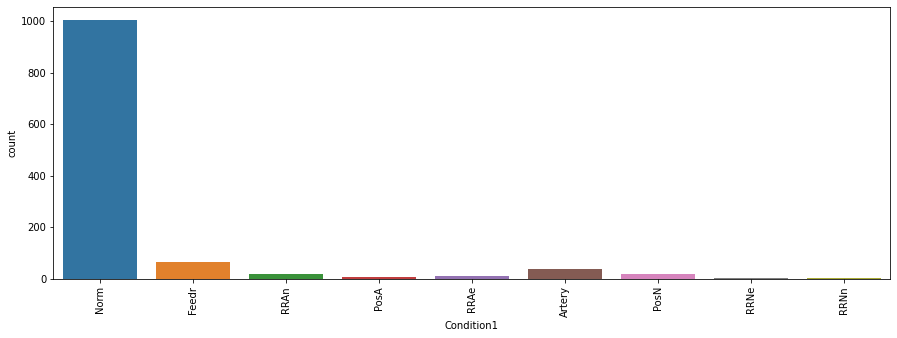

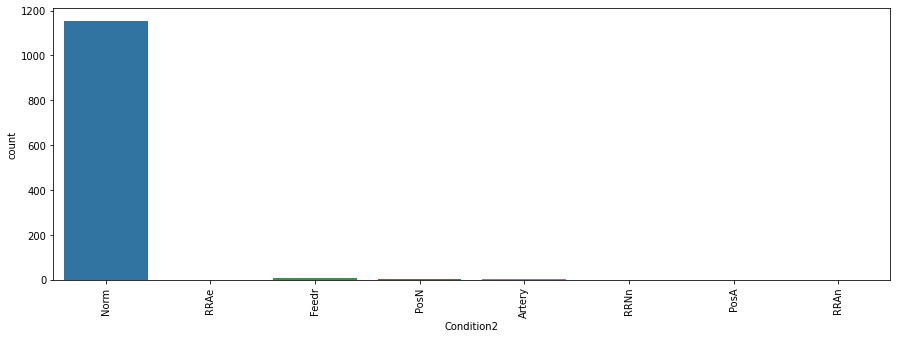

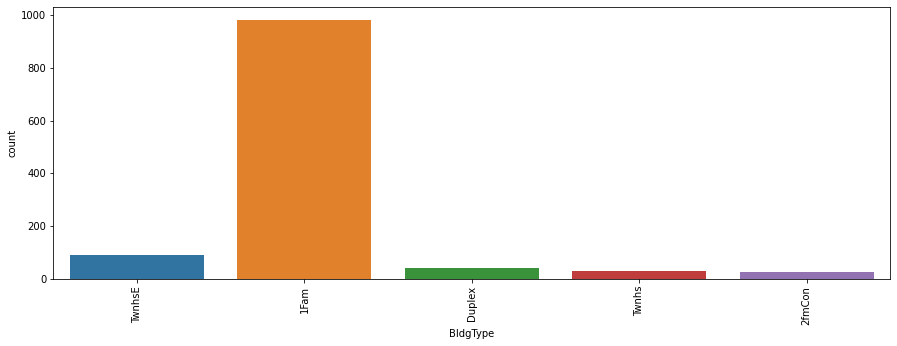

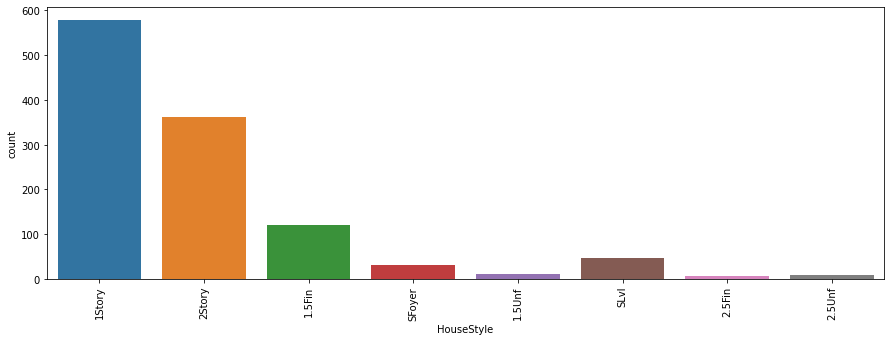

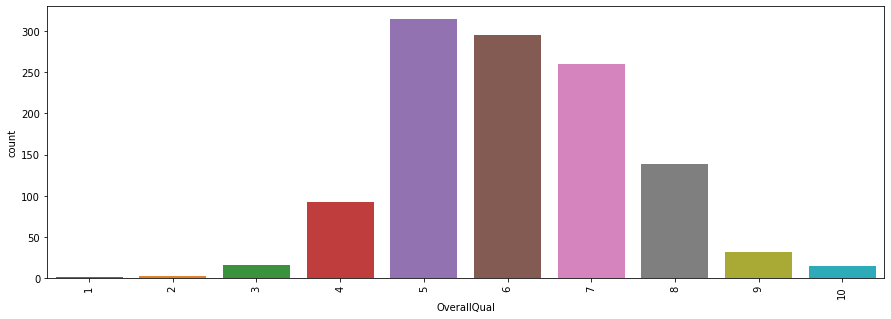

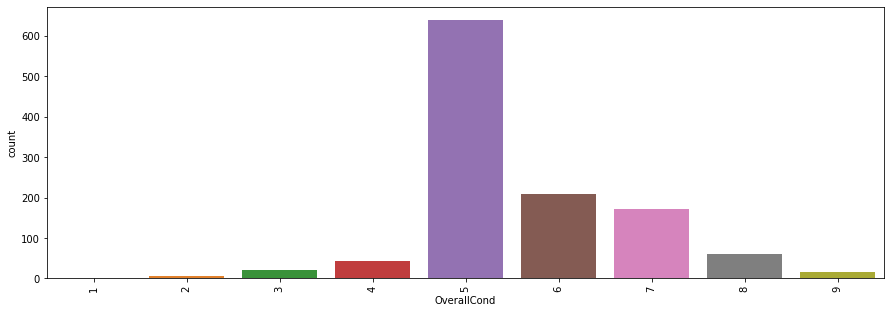

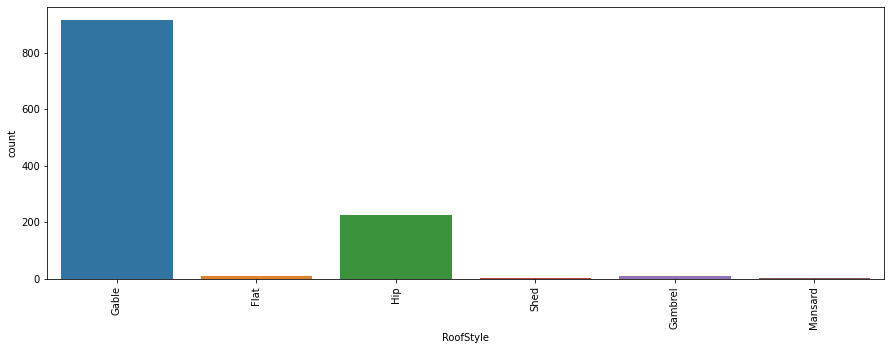

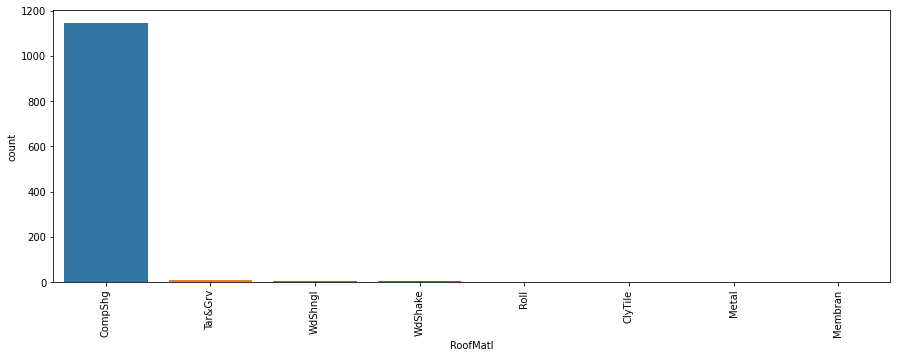

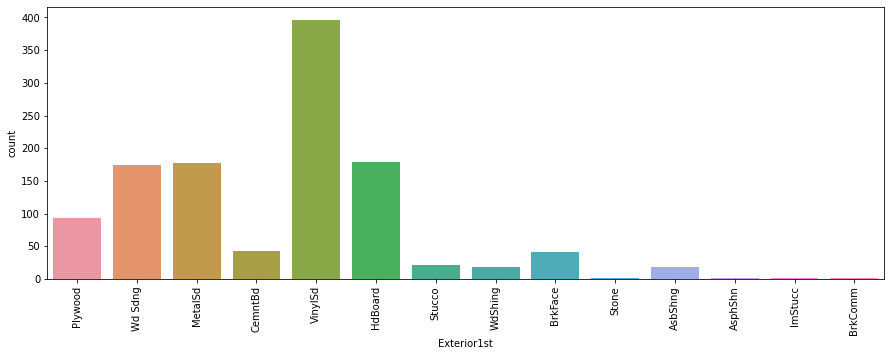

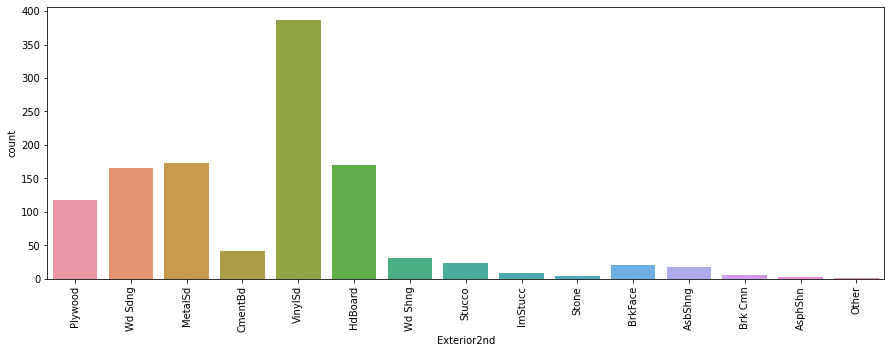

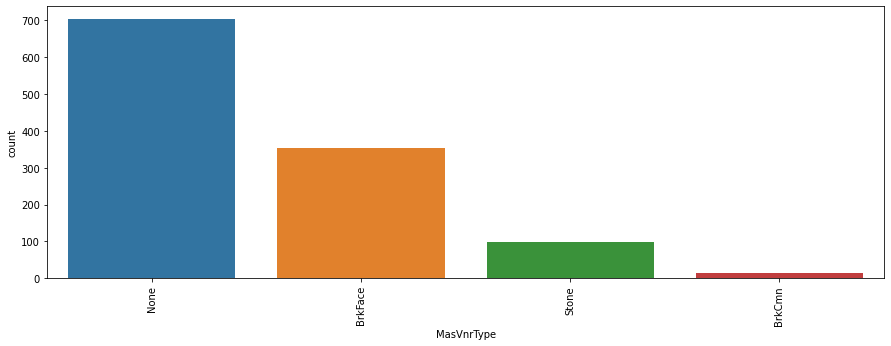

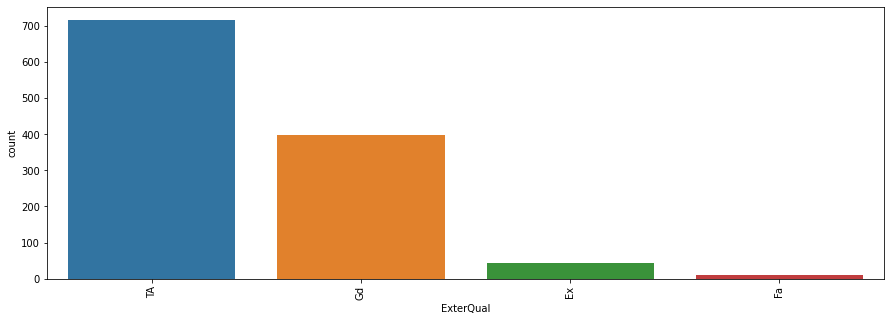

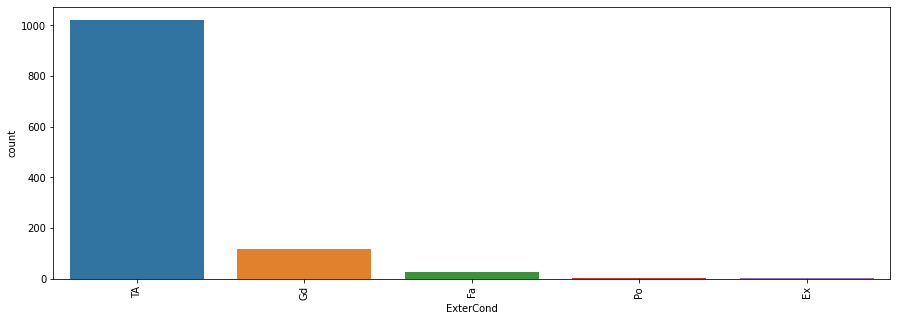

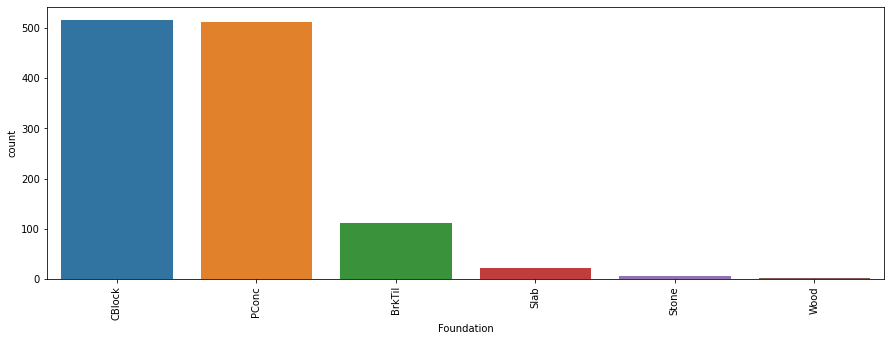

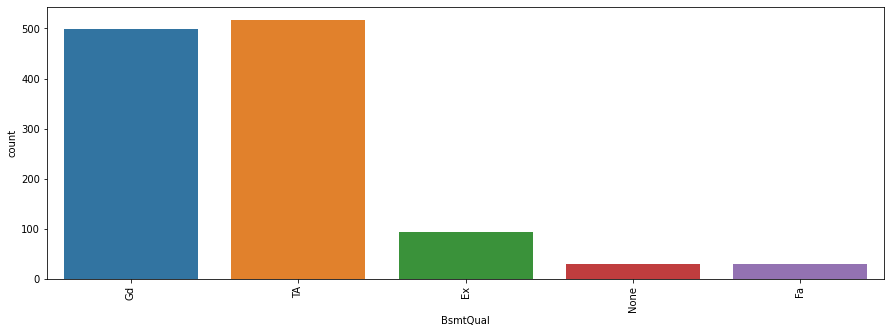

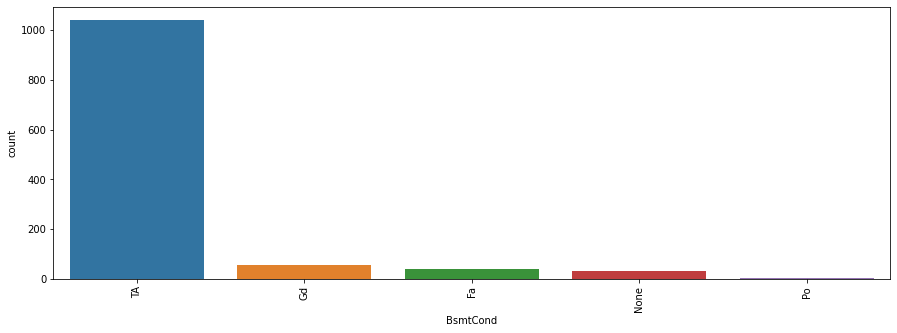

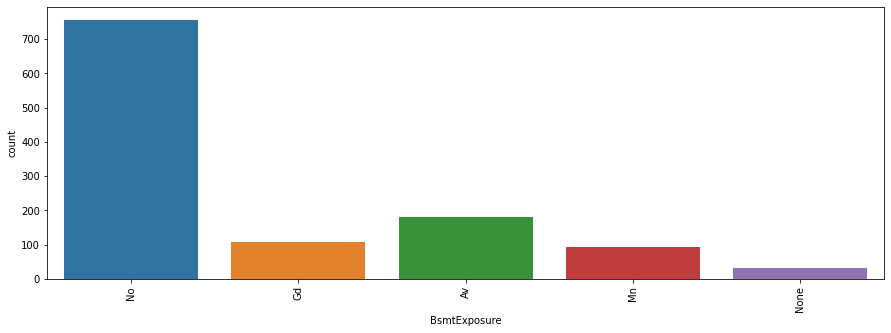

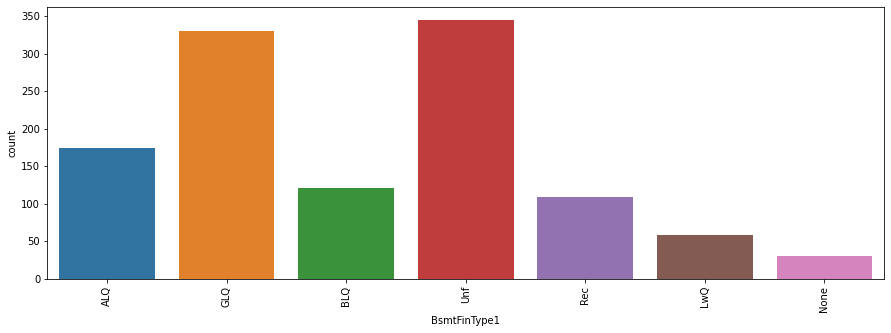

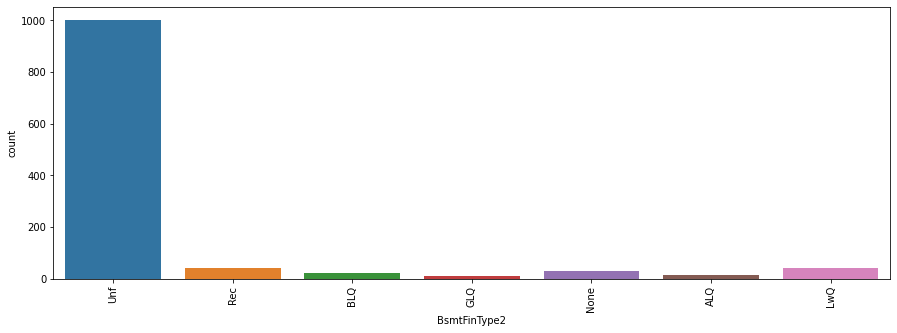

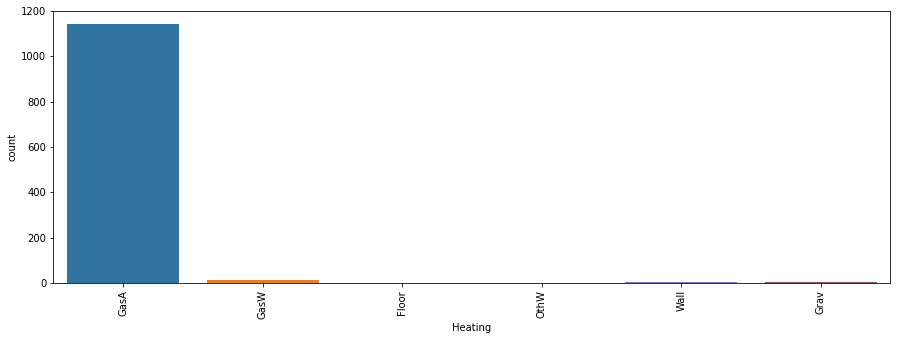

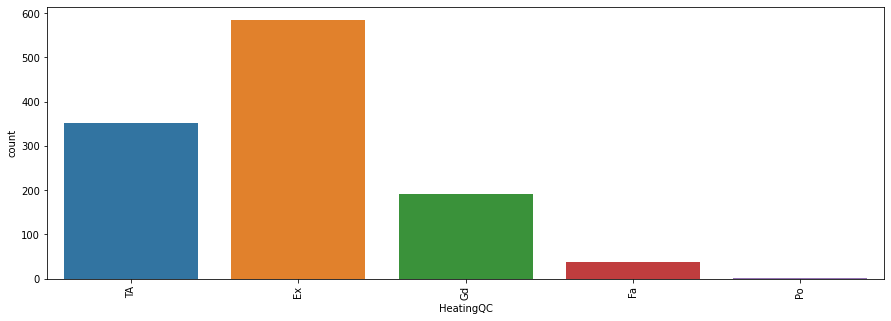

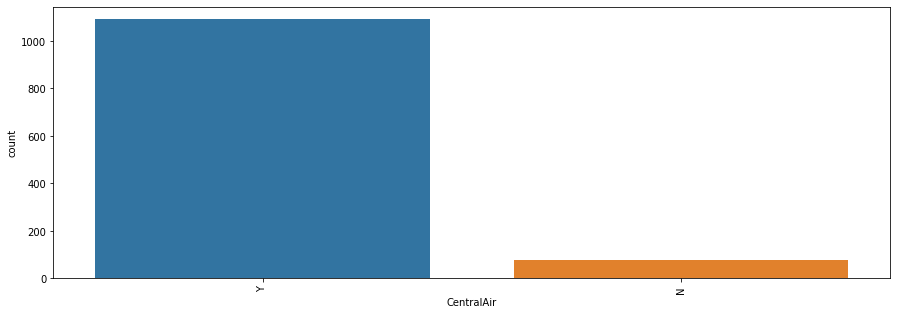

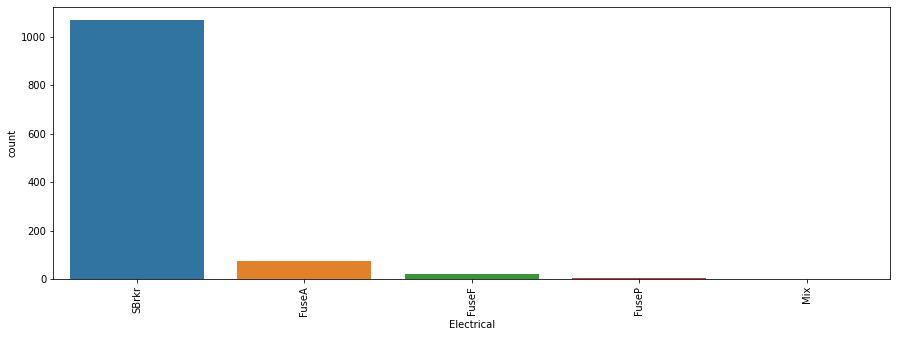

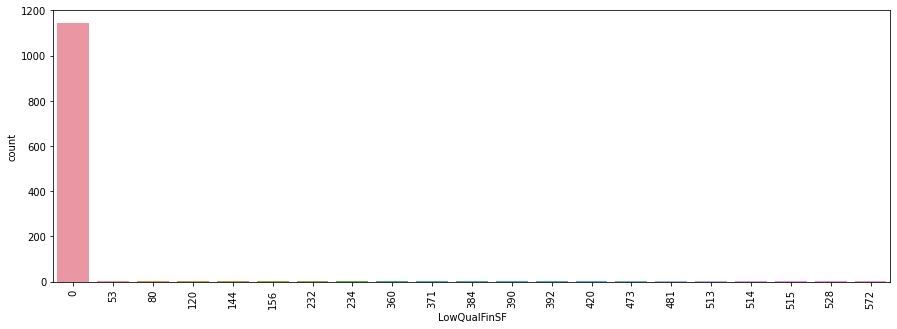

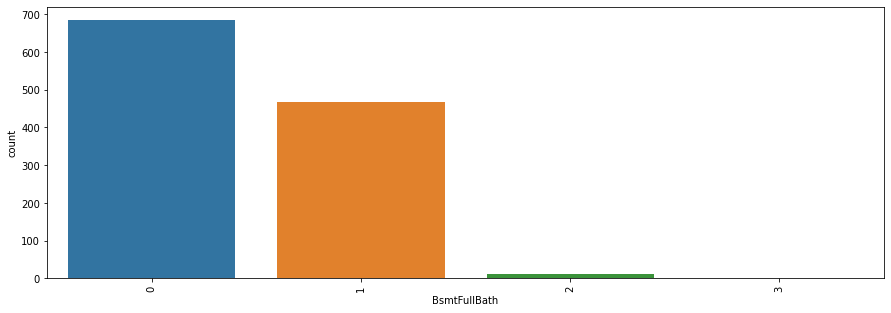

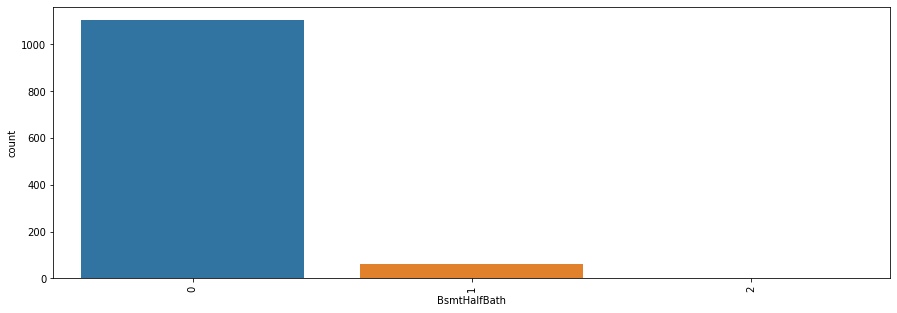

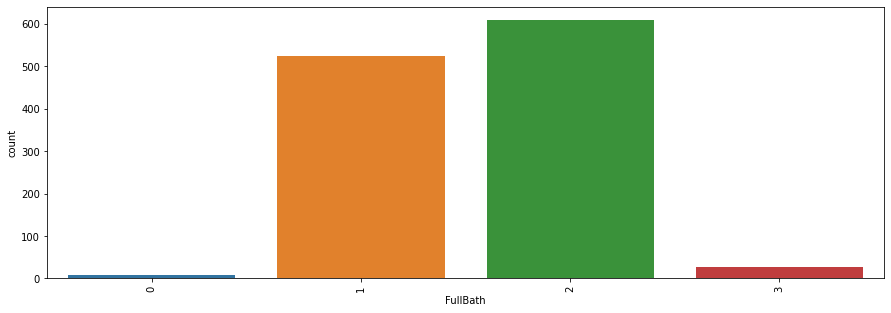

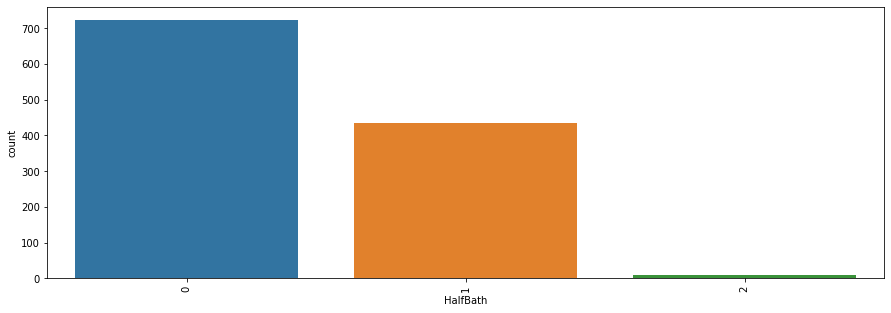

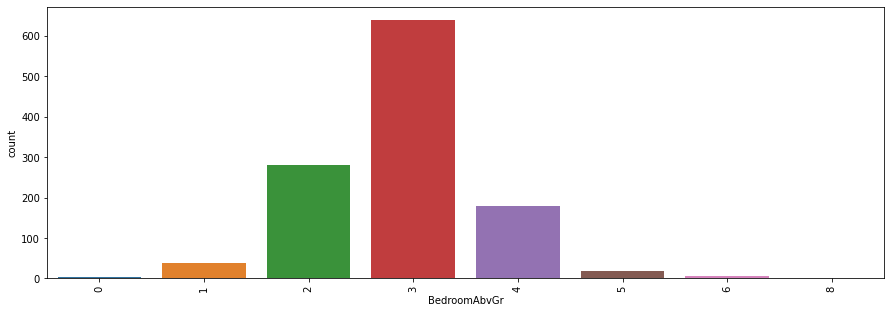

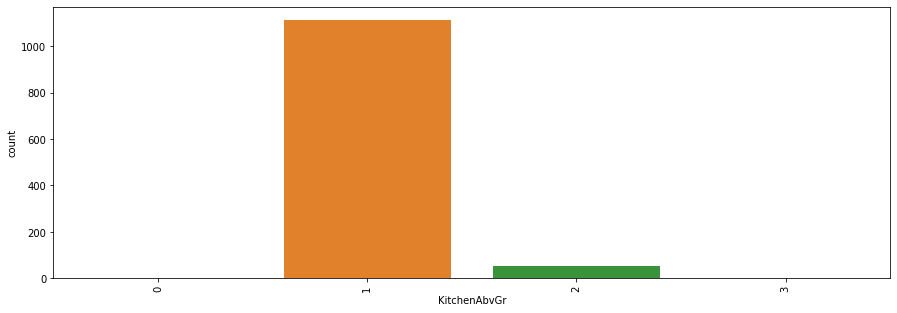

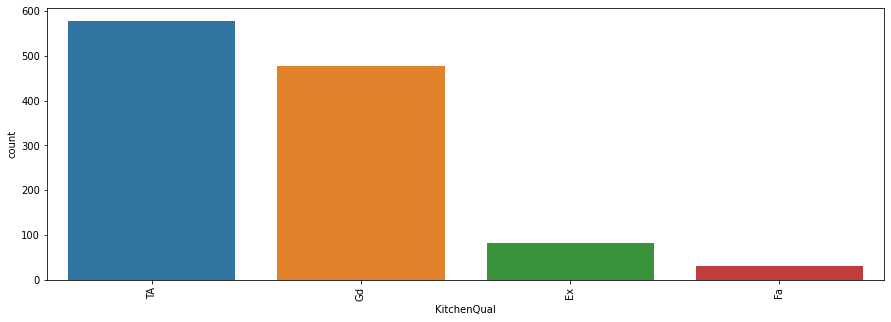

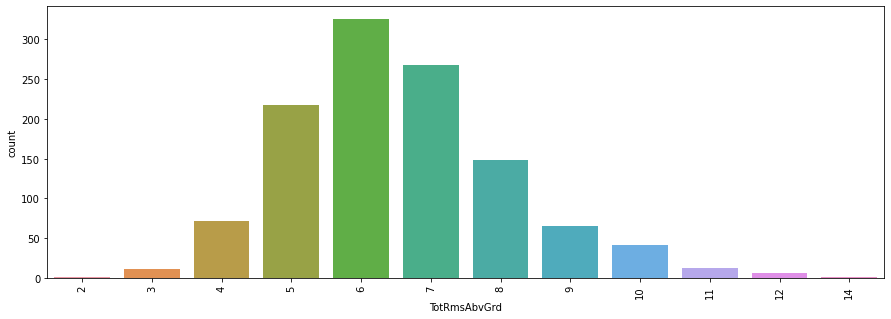

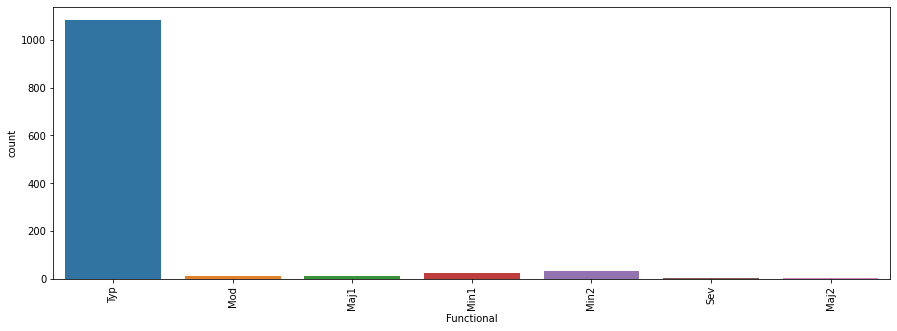

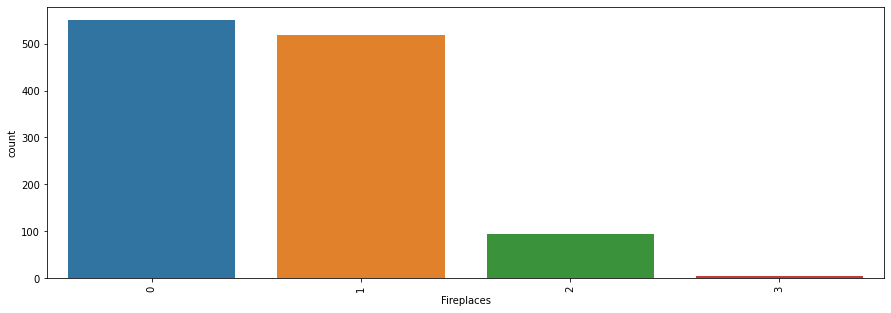

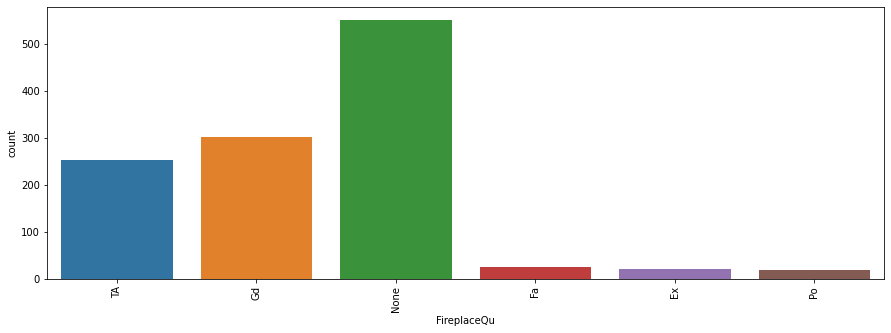

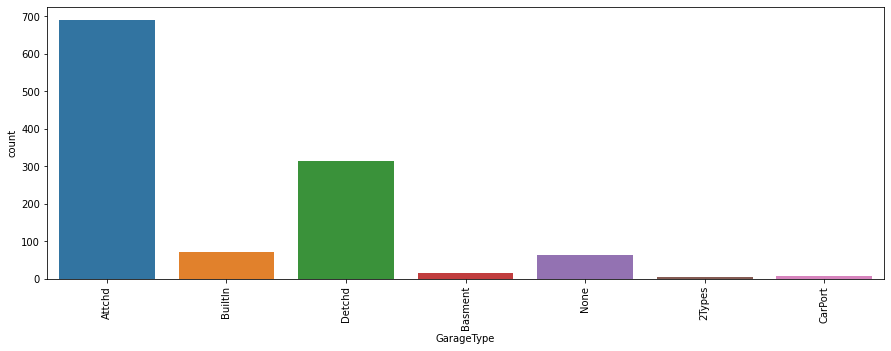

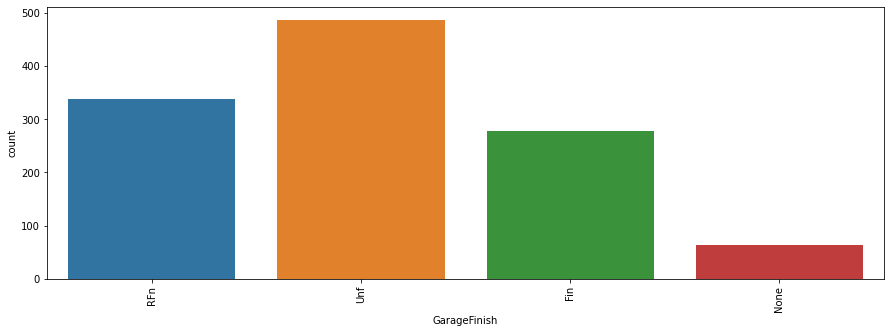

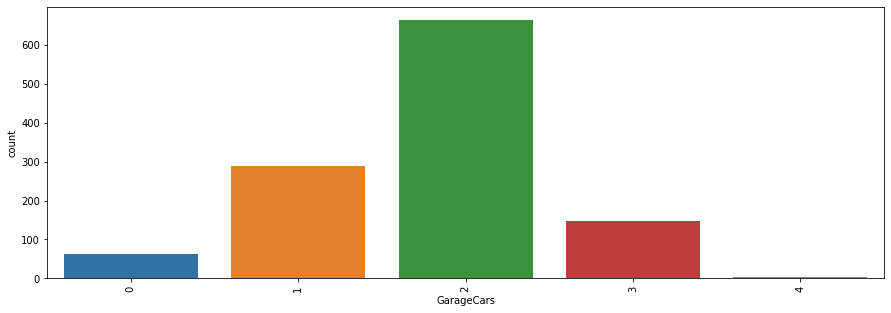

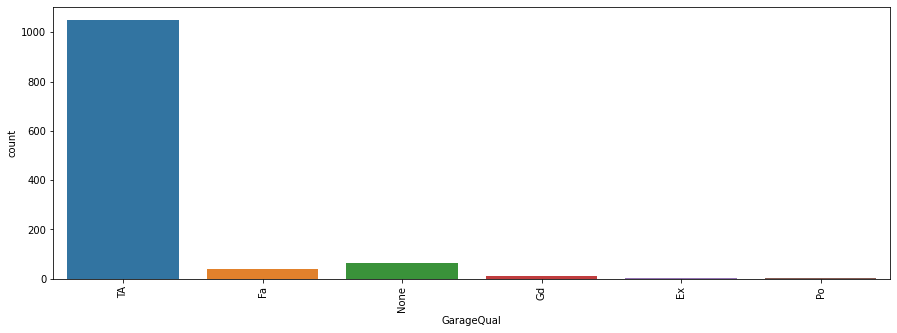

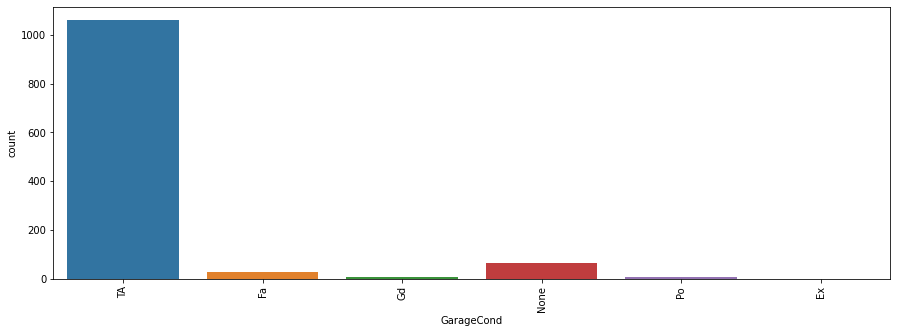

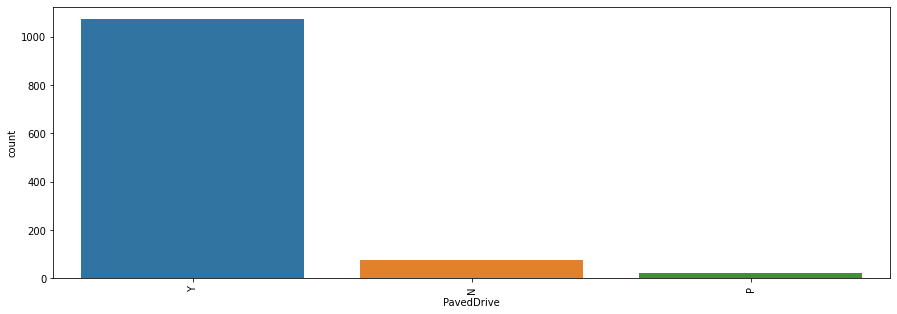

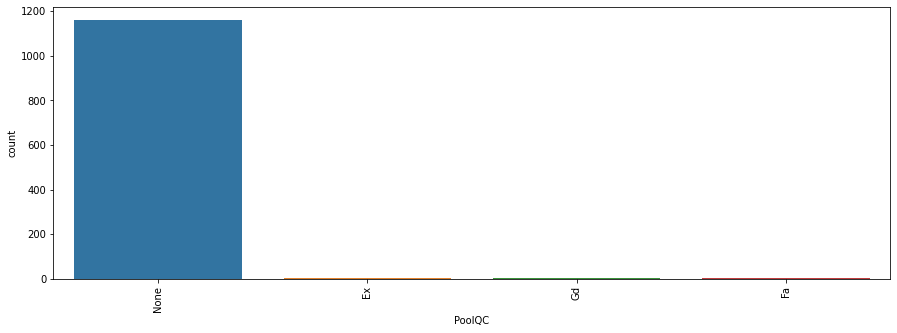

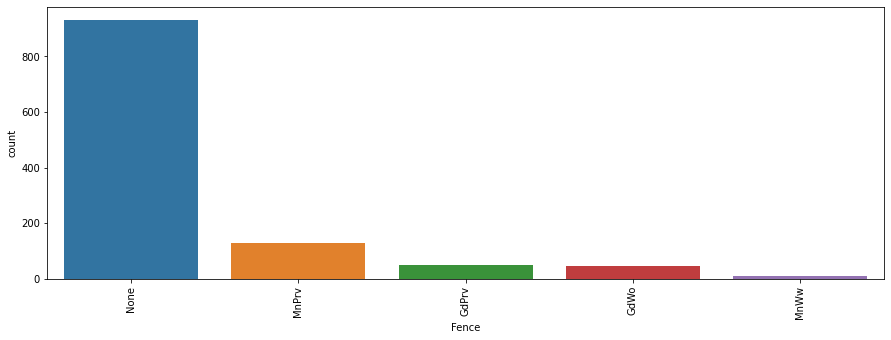

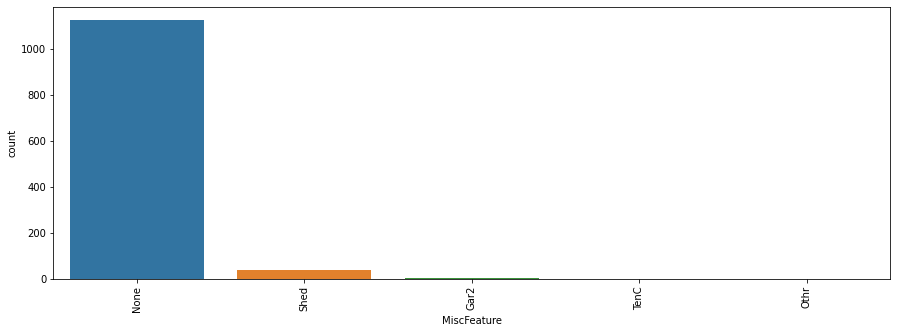

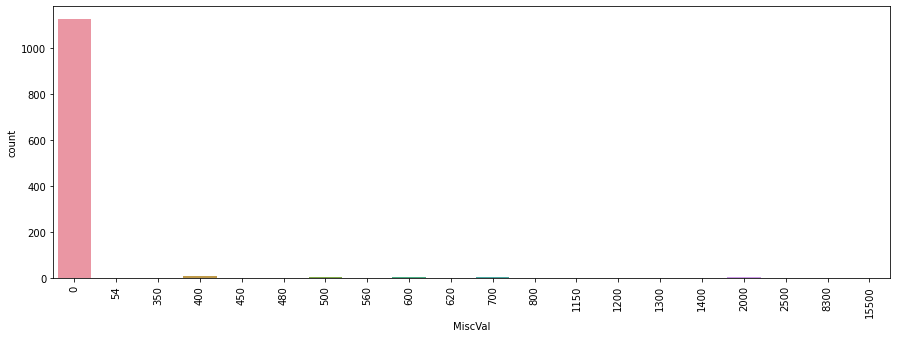

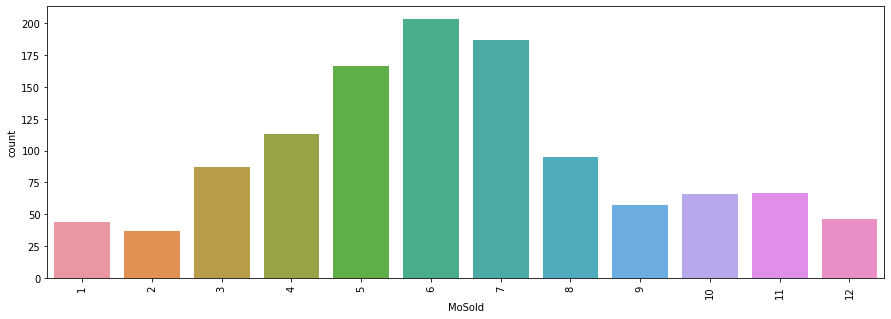

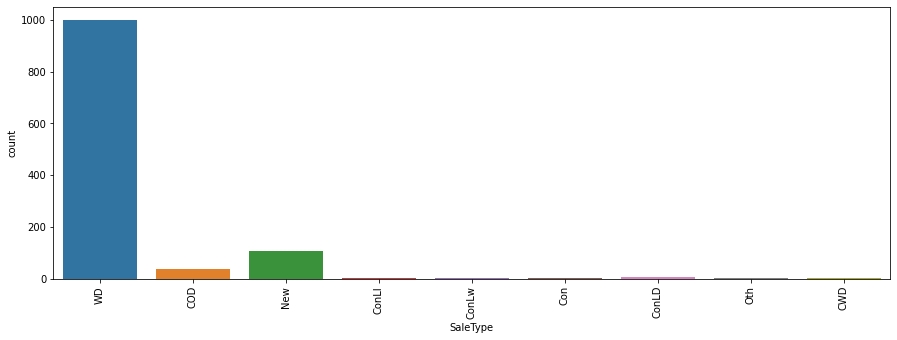

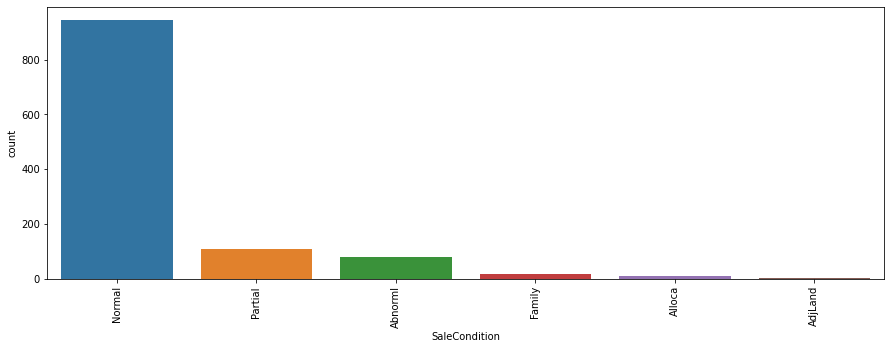

In [243]:
for i in column:
    plt.figure(figsize=(15,5))
    sns.countplot(data=df_train,x=i)
    plt.xticks(rotation=90);


There are two types of classification in street type 
1. Gravel
2. Paved
Highest number of house connected to paved street 

There are two types Gravel and paved alley and most of the house not have alley

Highest number of property have Regular shape  and 2nd highest is slightly irregular shape 

Highest number of property land near to flat level

Near to the house all are public utilities 

Highest number of property have inside lot configuration

highest number of property have gentle slope 

Highest number of property sale zoning classifcation is "Residential low density and Redential Medium denisity"

Highest number of housing in NWAme(Northwest Ames)

Highest number of property Proximity to various conditions is Normal

Most of the property have build type is 1Fam(Single-Family Detached)

Most of the house have 1Story and 2story  House style

Majority of House quality is average and above average 

Majority of house condition is average and below avergae

Majority of house have the Gable type of roof

Most of the house roof used CompShg(Standerd compiste shingle)  material used 

Majority used Vinly Siding  for Exterior covering on house 

Majority of Masonry veneer type  house used brick face

Majority of the house quality of the material on the exterior typical and average

Majority of the houses foundation type is Cinder Clock (Cblock) or Poured Concrete(PConc)

Majority of houses  have 90-99 inches basement and 80 -89 inches average basements

Highest number of houses basement condition is average and typical 

Majority of the Houses NO basement exposer garden level walls

Most of the house basement finished area is unfinshed and Good living quarters

Highest number of houses have heating quality and condition is Excellent

Some of the houses not have centerak air conditioning

Highest number of houses kitchen quality is average 

Majority of the house have grage is attached 

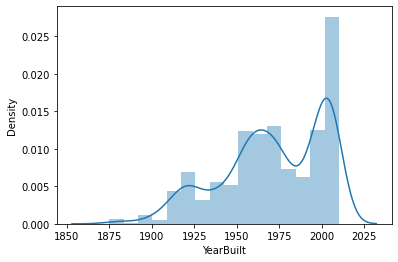

In [244]:
sns.distplot(df_train["YearBuilt"]);

Majority of the houses buit inbetween 2000 to 2010

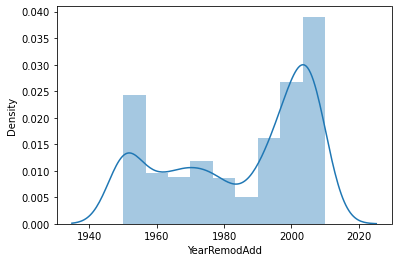

In [245]:
sns.distplot(df_train["YearRemodAdd"]);

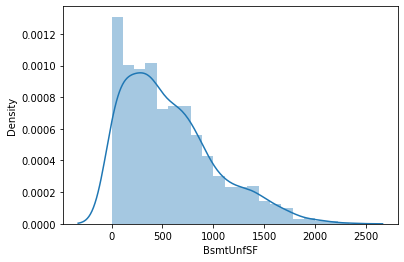

In [246]:
sns.distplot(df_train["BsmtUnfSF"]);

Observation : Majority of houses Unfinshed basement area is 0 to 100 square feet

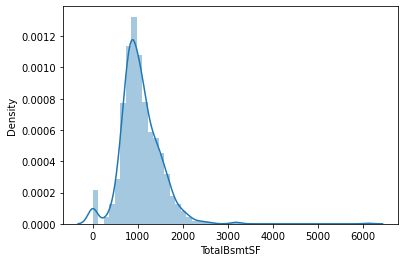

In [247]:
sns.distplot(df_train["TotalBsmtSF"]);

Observation: we clearly see that majority of houses total basement area is 1000 square feet

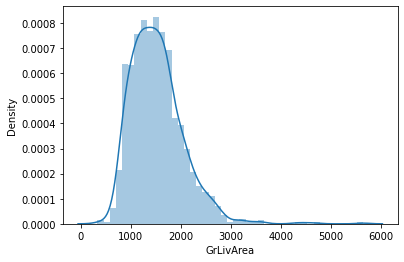

In [248]:
sns.distplot(df_train["GrLivArea"]);

Observation: most of the houses above gournd level living area is 1000 to 2000 square feet

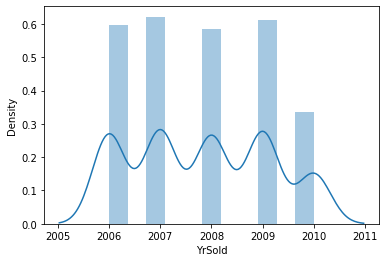

In [249]:
sns.distplot(df_train["YrSold"]);

Observation: Highest number of house sold in the year of 2007 and 2009 

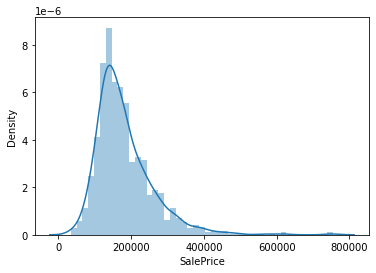

In [250]:
sns.distplot(df_train["SalePrice"]);

Multivarient Analysis

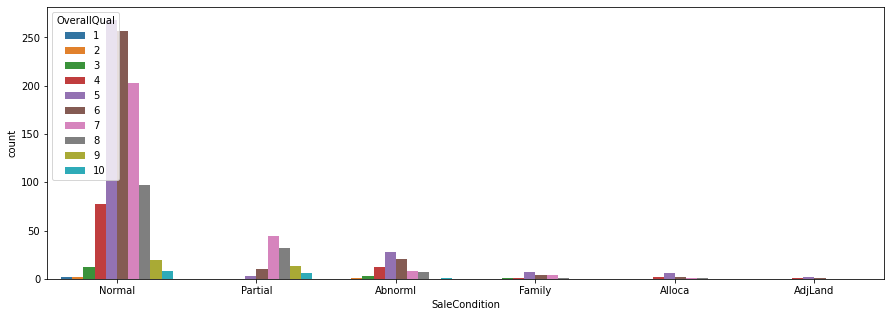

In [251]:
fig=plt.figure(figsize=(15,5))
sns.countplot(x='SaleCondition',hue='OverallQual',  data=df_train)
plt.show()

Observation : which houses have overall quality is average(6) & and above average(7) sale condition is normal and which house is good and very good sale condition is paritial

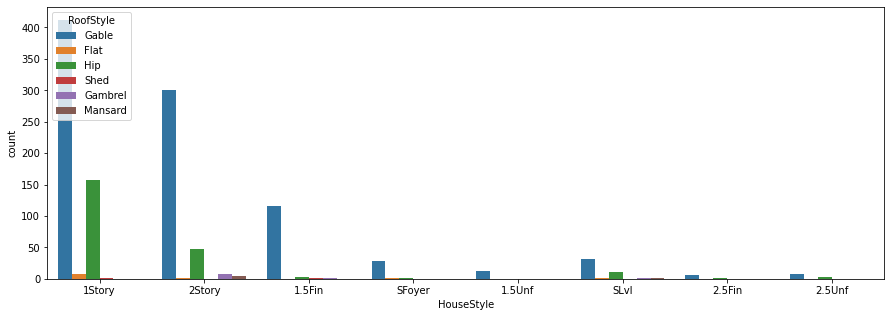

In [252]:

fig=plt.figure(figsize=(15,5))
sns.countplot(x='HouseStyle',hue='RoofStyle',  data=df_train)
plt.show()

Most of the house have roofstyle is gable 

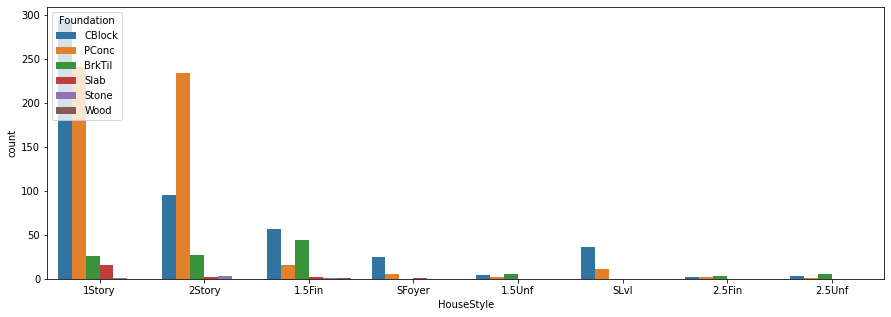

In [253]:

fig=plt.figure(figsize=(15,5))
sns.countplot(x='HouseStyle',hue='Foundation',  data=df_train)
plt.show()

Observation: We clearly sees that one sotry houses have highest number of Cblock foundation and 2story buildings have Pconc foundations

In [254]:
df_train.describe().T

count           mean  ...        75%       max
Id             1168.0     724.136130  ...    1079.50    1460.0
MSSubClass     1168.0      56.767979  ...      70.00     190.0
LotFrontage    1168.0      70.988470  ...      79.25     313.0
LotArea        1168.0   10484.749144  ...   11515.50  164660.0
OverallQual    1168.0       6.104452  ...       7.00      10.0
OverallCond    1168.0       5.595890  ...       6.00       9.0
YearBuilt      1168.0    1970.930651  ...    2000.00    2010.0
YearRemodAdd   1168.0    1984.758562  ...    2004.00    2010.0
MasVnrArea     1168.0     102.310078  ...     160.00    1600.0
BsmtFinSF1     1168.0     444.726027  ...     714.50    5644.0
BsmtFinSF2     1168.0      46.647260  ...       0.00    1474.0
BsmtUnfSF      1168.0     569.721747  ...     816.00    2336.0
TotalBsmtSF    1168.0    1061.095034  ...    1291.50    6110.0
1stFlrSF       1168.0    1169.860445  ...    1392.00    4692.0
2ndFlrSF       1168.0     348.826199  ...     729.00    2065.0
LowQualFinSF   1168.0       6.380137  ...       0.00     572.0
GrLivArea      1168.0    1525.066781  ...    1795.00    5642.0
BsmtFullBath   1168.0       0.425514  ...       1.00       3.0
BsmtHalfBath   1168.0       0.055651  ...       0.00       2.0
FullBath       1168.0       1.562500  ...       2.00       3.0
HalfBath       1168.0       0.388699  ...       1.00       2.0
BedroomAbvGr   1168.0       2.884418  ...       3.00       8.0
KitchenAbvGr   1168.0       1.045377  ...       1.00       3.0
TotRmsAbvGrd   1168.0       6.542808  ...       7.00      14.0
Fireplaces     1168.0       0.617295  ...       1.00       3.0
GarageYrBlt    1168.0    1978.193841  ...    2001.00    2010.0
GarageCars     1168.0       1.776541  ...       2.00       4.0
GarageArea     1168.0     476.860445  ...     576.00    1418.0
WoodDeckSF     1168.0      96.206336  ...     171.00     857.0
OpenPorchSF    1168.0      46.559932  ...      70.00     547.0
EnclosedPorch  1168.0      23.015411  ...       0.00     552.0
3SsnPorch      1168.0       3.639555  ...       0.00     508.0
ScreenPorch    1168.0      15.051370  ...       0.00     480.0
PoolArea       1168.0       3.448630  ...       0.00     738.0
MiscVal        1168.0      47.315068  ...       0.00   15500.0
MoSold         1168.0       6.344178  ...       8.00      12.0
YrSold         1168.0    2007.804795  ...    2009.00    2010.0
SalePrice      1168.0  181477.005993  ...  215000.00  755000.0

[38 rows x 8 columns]

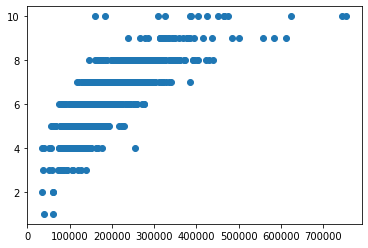

In [255]:
plt.scatter(df_train['SalePrice'],df_train['OverallQual'])

Observation : We clearly see that as over all quality of the house increase sale price of the house also increase

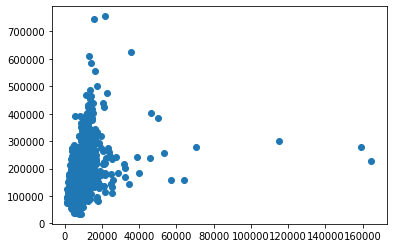

In [256]:
plt.scatter(df_train['LotArea'],df_train['SalePrice'])

Observation: There is not much relation between lot area and house sale price and we also see some outliers in lot area 

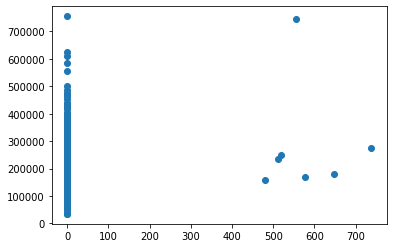

In [257]:
plt.scatter(df_train['PoolArea'],df_train['SalePrice'])

In [258]:
# selecting the object types columns 
df_train.select_dtypes(include=object, exclude=None).head(1)

MSZoning Street Alley LotShape  ... Fence MiscFeature SaleType SaleCondition
0       RL   Pave  None      IR1  ...  None        None       WD        Normal

[1 rows x 43 columns]

In [259]:
df_train['Fence'].isnull().sum()

0

In [260]:
df_train['PoolQC'].isnull().sum()

0

In [261]:
#droping the columns PoolQC contains only null values 
#df_train.drop(['PoolQC'], axis=1)

In [262]:
#Encoding the Cateogorical variables 
#label encoding 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

df_train['MSZoning'] = le.fit_transform(df_train['MSZoning'])
df_train['Street'] = le.fit_transform(df_train['Street'])
df_train['Alley'] = le.fit_transform(df_train['Alley'])
df_train['LotShape'] = le.fit_transform(df_train['LotShape'])
df_train['LandContour'] = le.fit_transform(df_train['LandContour'])
df_train['Utilities'] = le.fit_transform(df_train['Utilities'])
df_train['LotConfig'] = le.fit_transform(df_train['LotConfig'])
df_train['LandSlope'] = le.fit_transform(df_train['LandSlope'])
df_train['Neighborhood'] = le.fit_transform(df_train['Neighborhood'])

df_train['Condition1'] = le.fit_transform(df_train['Condition1'])
df_train['Condition2'] = le.fit_transform(df_train['Condition2'])
df_train['BldgType'] = le.fit_transform(df_train['BldgType'])
df_train['HouseStyle'] = le.fit_transform(df_train['HouseStyle'])
df_train['RoofStyle'] = le.fit_transform(df_train['RoofStyle'])
df_train['RoofMatl'] = le.fit_transform(df_train['RoofMatl'])
df_train['Exterior1st'] = le.fit_transform(df_train['Exterior1st'])
df_train['Exterior2nd'] = le.fit_transform(df_train['Exterior2nd'])
df_train['MasVnrType'] = le.fit_transform(df_train['MasVnrType'])

df_train['ExterQual'] = le.fit_transform(df_train['ExterQual'])
df_train['ExterCond'] = le.fit_transform(df_train['ExterCond'])
df_train['Foundation'] = le.fit_transform(df_train['Foundation'])
df_train['BsmtQual'] = le.fit_transform(df_train['BsmtQual'])
df_train['BsmtExposure'] = le.fit_transform(df_train['BsmtExposure'])
df_train['BsmtCond'] = le.fit_transform(df_train['BsmtCond'])
df_train['BsmtFinType1'] = le.fit_transform(df_train['BsmtFinType1'])
df_train['BsmtFinType2'] = le.fit_transform(df_train['BsmtFinType2'])
df_train['Heating'] = le.fit_transform(df_train['Heating'])

df_train['HeatingQC'] = le.fit_transform(df_train['HeatingQC'])
df_train['CentralAir'] = le.fit_transform(df_train['CentralAir'])
df_train['Electrical'] = le.fit_transform(df_train['Electrical'])
df_train['KitchenQual'] = le.fit_transform(df_train['KitchenQual'])
df_train['Functional'] = le.fit_transform(df_train['Functional'])
df_train['FireplaceQu'] = le.fit_transform(df_train['FireplaceQu'])
df_train['GarageType'] = le.fit_transform(df_train['GarageType'])
df_train['GarageFinish'] = le.fit_transform(df_train['GarageFinish'])
df_train['GarageQual'] = le.fit_transform(df_train['GarageQual'])

df_train['GarageCond'] = le.fit_transform(df_train['GarageCond'])
df_train['PavedDrive'] = le.fit_transform(df_train['PavedDrive'])
df_train['PoolQC'] = le.fit_transform(df_train['PoolQC'])
df_train['Fence'] = le.fit_transform(df_train['Fence'])
df_train['MiscFeature'] = le.fit_transform(df_train['MiscFeature'])
df_train['SaleType'] = le.fit_transform(df_train['SaleType'])
df_train['SaleCondition'] = le.fit_transform(df_train['SaleCondition'])







In [263]:
df_test['MSZoning'] = le.fit_transform(df_test['MSZoning'])
df_test['Street'] = le.fit_transform(df_test['Street'])
df_test['Alley'] = le.fit_transform(df_test['Alley'])
df_test['LotShape'] = le.fit_transform(df_test['LotShape'])
df_test['LandContour'] = le.fit_transform(df_test['LandContour'])
df_test['Utilities'] = le.fit_transform(df_test['Utilities'])
df_test['LotConfig'] = le.fit_transform(df_test['LotConfig'])
df_test['LandSlope'] = le.fit_transform(df_test['LandSlope'])
df_test['Neighborhood'] = le.fit_transform(df_test['Neighborhood'])

df_test['Condition1'] = le.fit_transform(df_test['Condition1'])
df_test['Condition2'] = le.fit_transform(df_test['Condition2'])
df_test['BldgType'] = le.fit_transform(df_test['BldgType'])
df_test['HouseStyle'] = le.fit_transform(df_test['HouseStyle'])
df_test['RoofStyle'] = le.fit_transform(df_test['RoofStyle'])
df_test['RoofMatl'] = le.fit_transform(df_test['RoofMatl'])
df_test['Exterior1st'] = le.fit_transform(df_test['Exterior1st'])
df_test['Exterior2nd'] = le.fit_transform(df_test['Exterior2nd'])
df_test['MasVnrType'] = le.fit_transform(df_test['MasVnrType'])

df_test['ExterQual'] = le.fit_transform(df_test['ExterQual'])
df_test['ExterCond'] = le.fit_transform(df_test['ExterCond'])
df_test['Foundation'] = le.fit_transform(df_test['Foundation'])
df_test['BsmtQual'] = le.fit_transform(df_test['BsmtQual'])
df_test['BsmtExposure'] = le.fit_transform(df_test['BsmtExposure'])
df_test['BsmtCond'] = le.fit_transform(df_test['BsmtCond'])
df_test['BsmtFinType1'] = le.fit_transform(df_test['BsmtFinType1'])
df_test['BsmtFinType2'] = le.fit_transform(df_test['BsmtFinType2'])
df_test['Heating'] = le.fit_transform(df_test['Heating'])

df_test['HeatingQC'] = le.fit_transform(df_test['HeatingQC'])
df_test['CentralAir'] = le.fit_transform(df_test['CentralAir'])
df_test['Electrical'] = le.fit_transform(df_test['Electrical'])
df_test['KitchenQual'] = le.fit_transform(df_test['KitchenQual'])
df_test['Functional'] = le.fit_transform(df_test['Functional'])
df_test['FireplaceQu'] = le.fit_transform(df_test['FireplaceQu'])
df_test['GarageType'] = le.fit_transform(df_test['GarageType'])
df_test['GarageFinish'] = le.fit_transform(df_test['GarageFinish'])
df_test['GarageQual'] = le.fit_transform(df_test['GarageQual'])

df_test['GarageCond'] = le.fit_transform(df_test['GarageCond'])
df_test['PavedDrive'] = le.fit_transform(df_test['PavedDrive'])
df_test['PoolQC'] = le.fit_transform(df_test['PoolQC'])
df_test['Fence'] = le.fit_transform(df_test['Fence'])
df_test['MiscFeature'] = le.fit_transform(df_test['MiscFeature'])
df_test['SaleType'] = le.fit_transform(df_test['SaleType'])
df_test['SaleCondition'] = le.fit_transform(df_test['SaleCondition'])


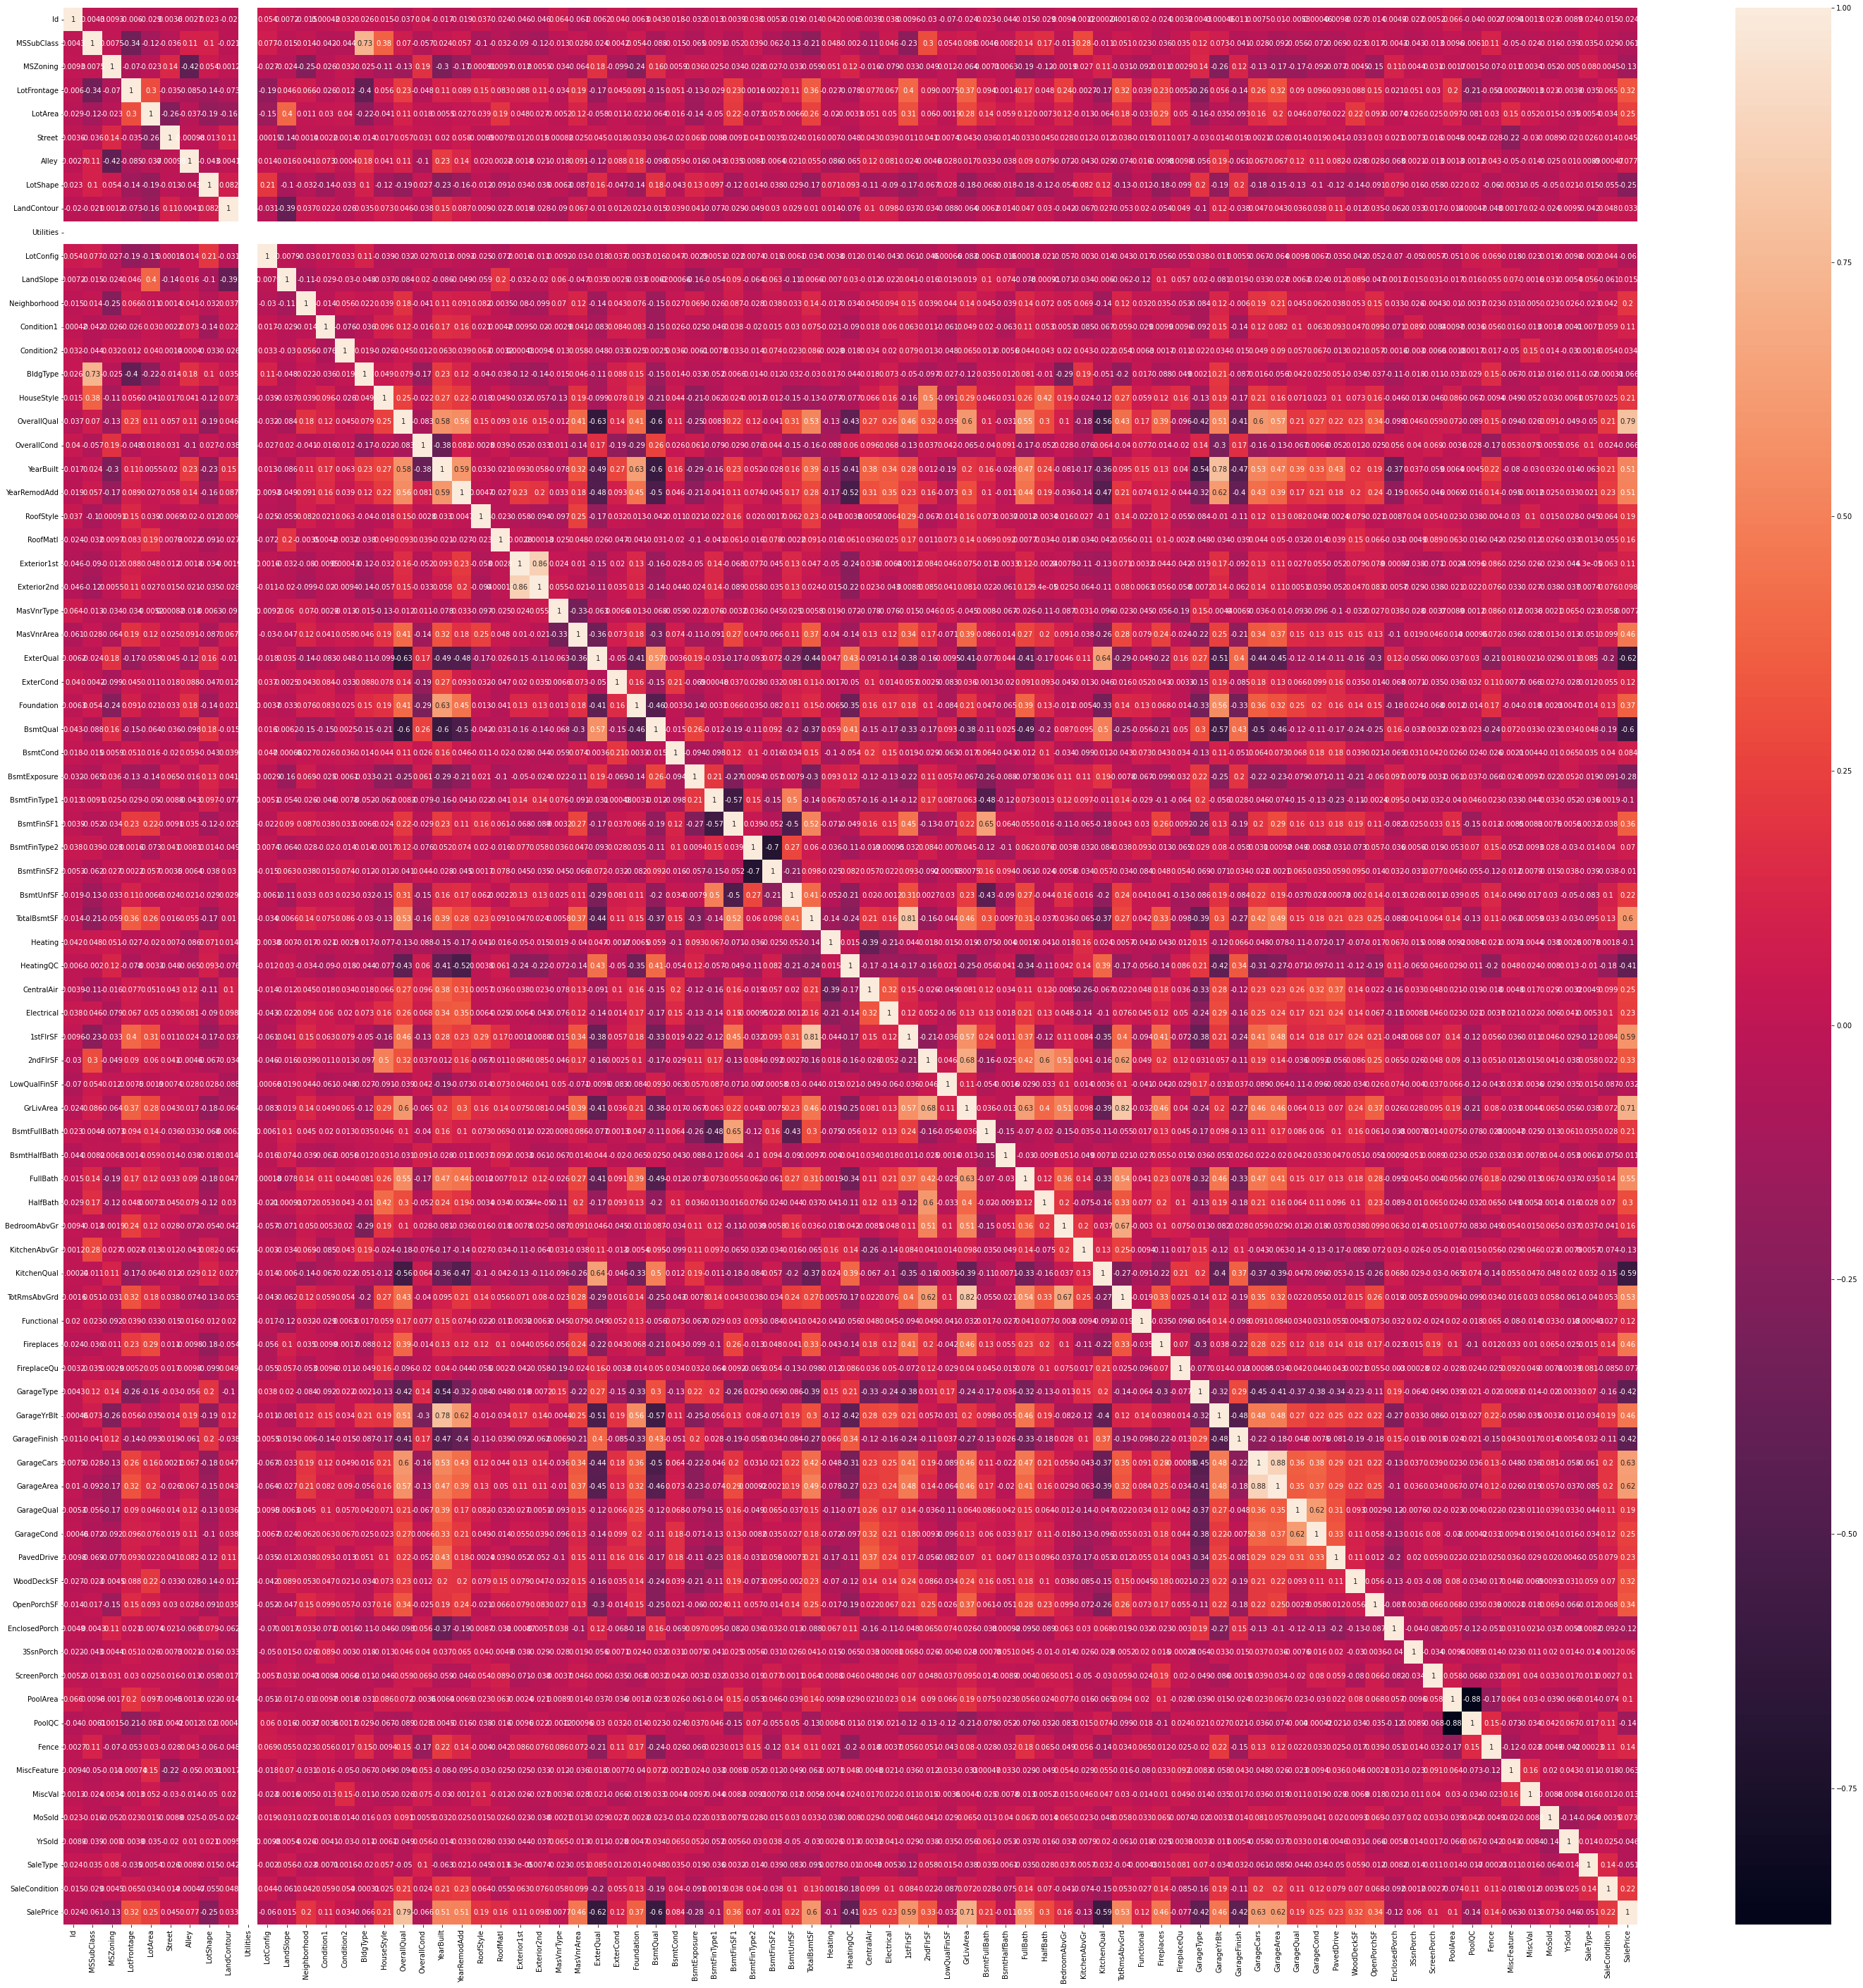

In [264]:
#To check the corr_mat  Heatmap
corr_hmap=df_train.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr_hmap, annot=True)
plt.show()

In [265]:
#to display the
corr_matrix=df_train.corr()

#please find the top 10 positive relation with dependet variable SALES PRICE 
corr_matrix['SalePrice'].sort_values(ascending = False).head(50)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.463626
Fireplaces       0.459611
GarageYrBlt      0.458007
Foundation       0.374169
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323779
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
GarageCond       0.249340
CentralAir       0.246754
Electrical       0.234621
PavedDrive       0.231707
SaleCondition    0.217687
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
HouseStyle       0.205502
Neighborhood     0.198942
RoofStyle        0.192654
GarageQual       0.192392
RoofMatl         0.159865
BedroomAbvGr     0.158281
Fence            0.143922
Functional       0.118673
ExterCond        0.115167
Exterior1st 

In [266]:
#Please find last ten negative relation ship with dependet variable salesprice 
corr_matrix['SalePrice'].sort_values(ascending = False).tail(10)

PoolQC         -0.141136
LotShape       -0.248171
BsmtExposure   -0.282480
HeatingQC      -0.406604
GarageType     -0.415370
GarageFinish   -0.424922
KitchenQual    -0.592468
BsmtQual       -0.601307
ExterQual      -0.624820
Utilities            NaN
Name: SalePrice, dtype: float64

In [267]:
#plot histogram
#df_train.boxplot(figsize=(50,50))
plt.show()

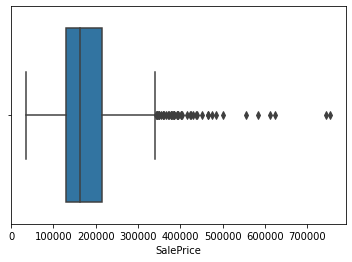

In [268]:
sns.boxplot(df_train['SalePrice'])
plt.show()

In [269]:
df2=df_train.select_dtypes(include=None, exclude=object).head(1)

In [270]:
df2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

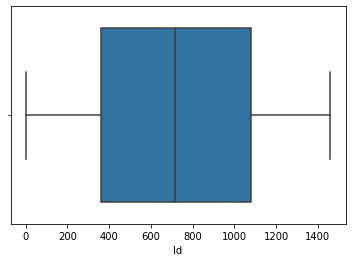

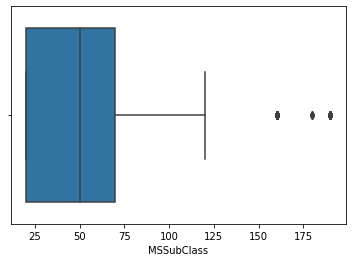

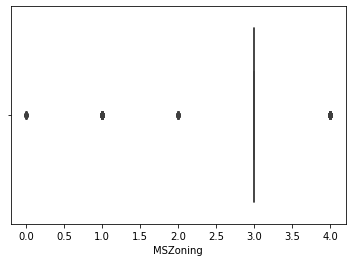

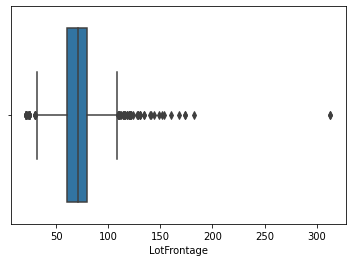

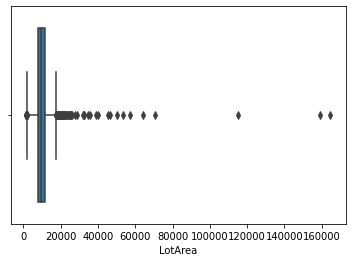

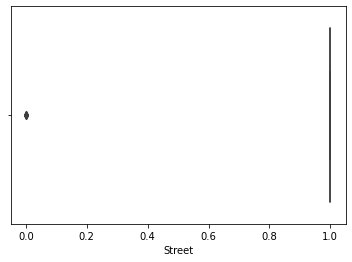

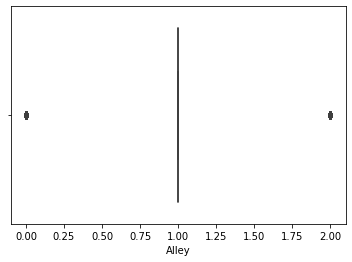

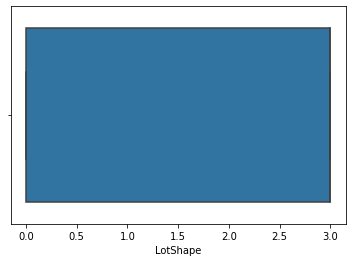

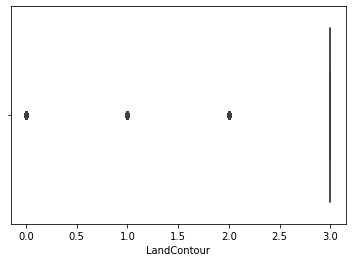

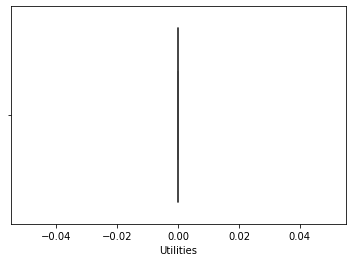

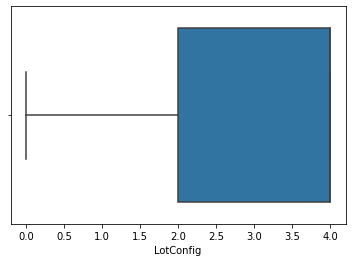

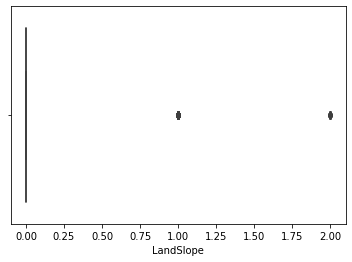

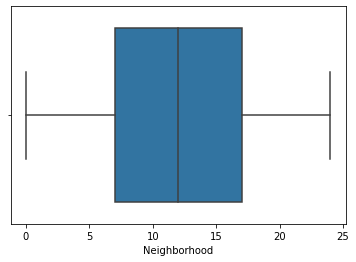

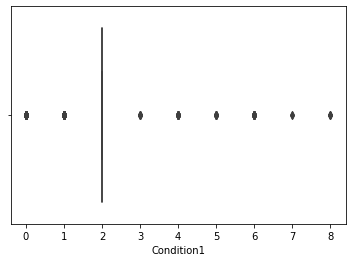

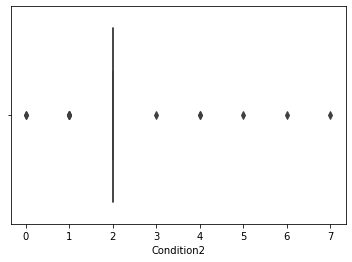

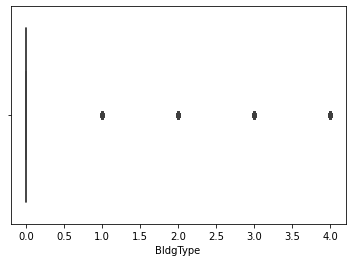

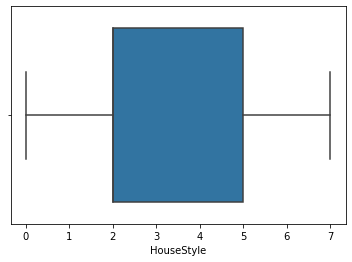

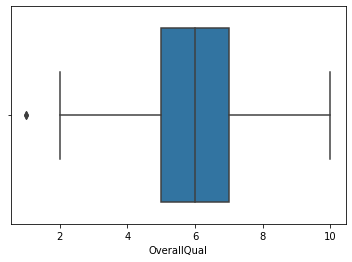

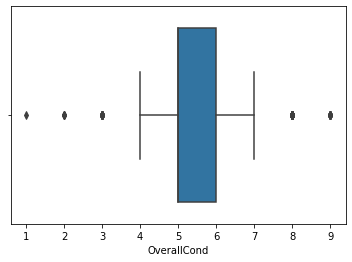

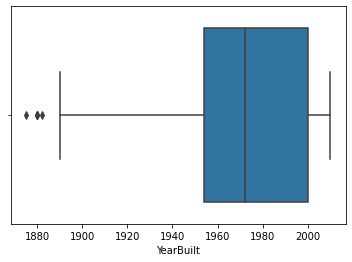

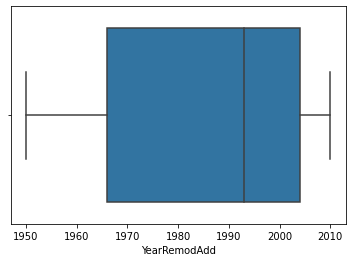

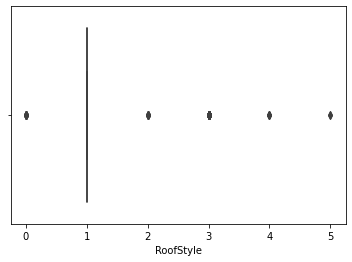

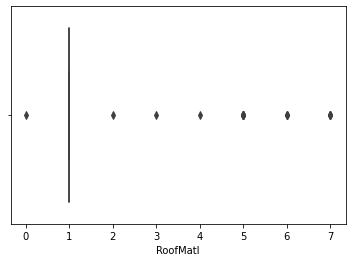

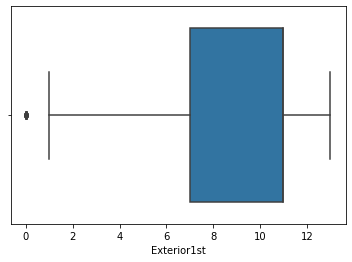

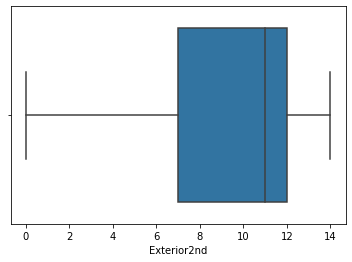

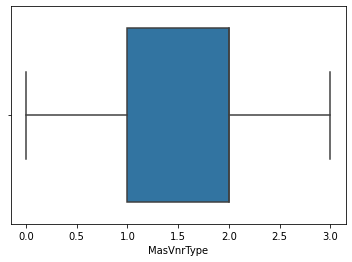

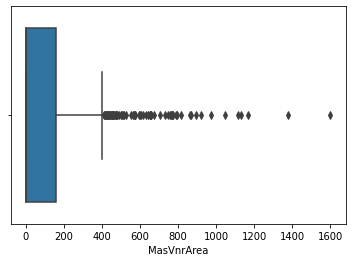

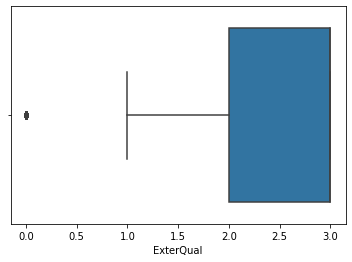

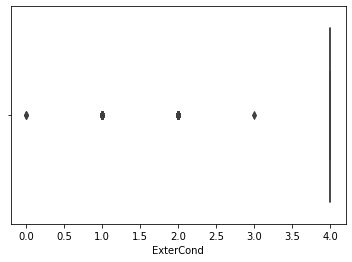

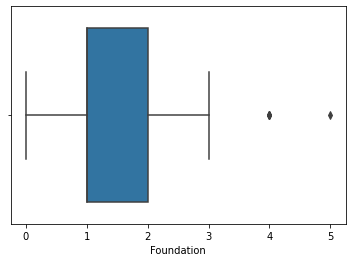

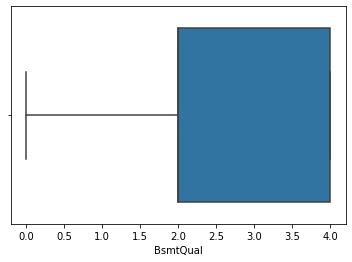

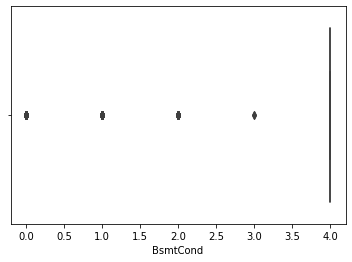

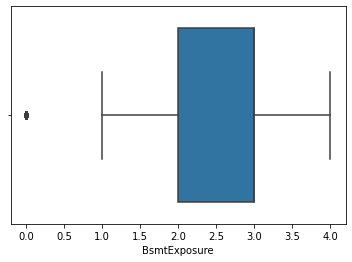

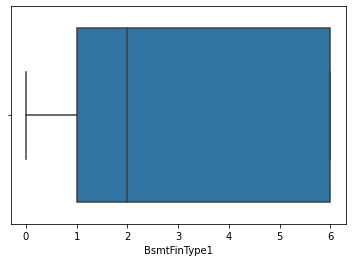

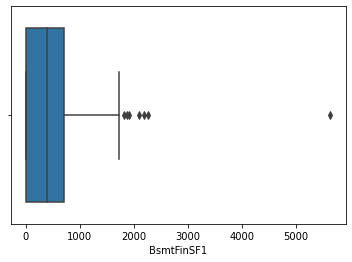

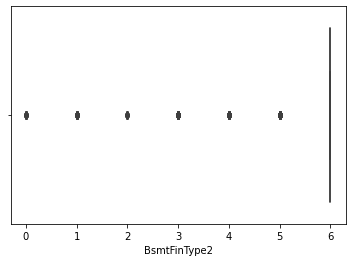

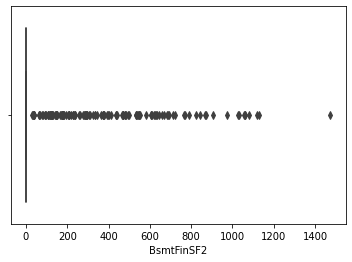

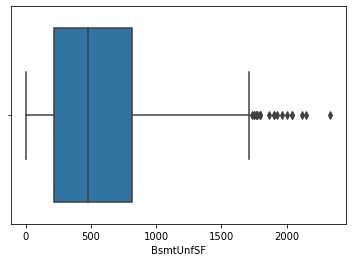

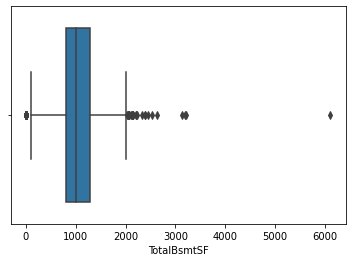

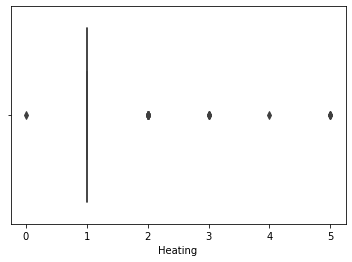

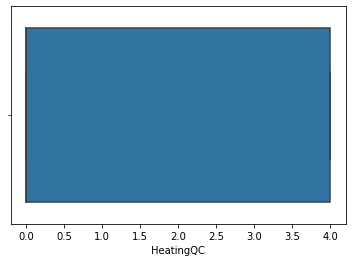

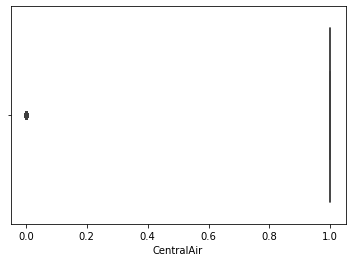

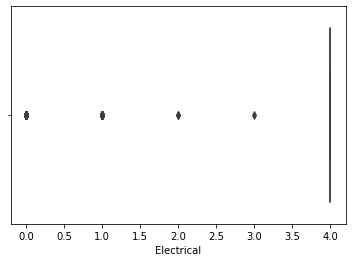

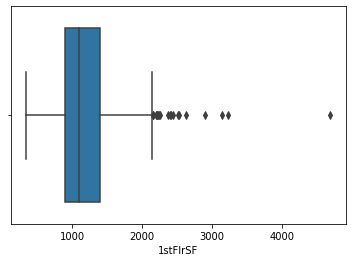

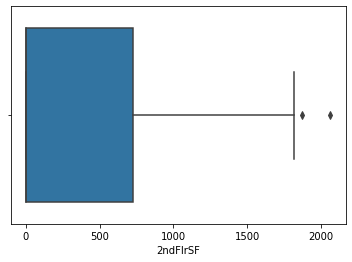

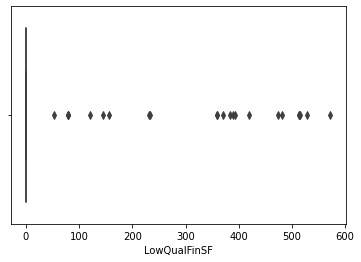

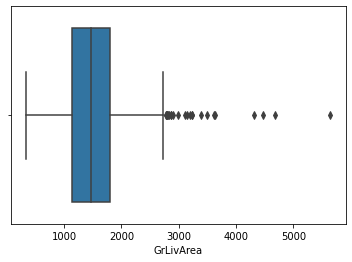

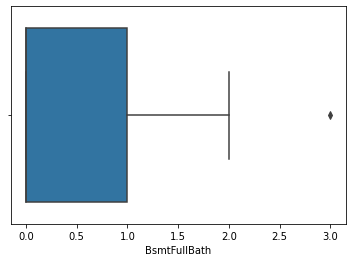

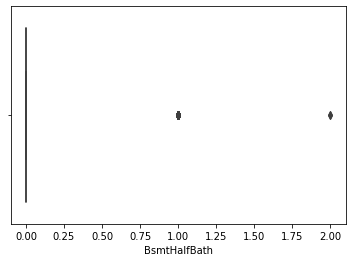

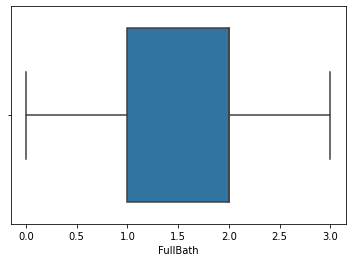

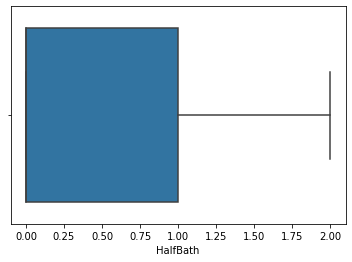

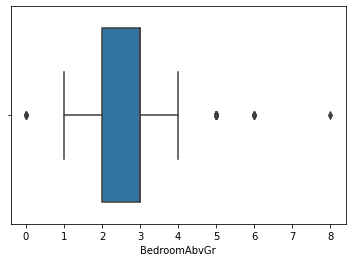

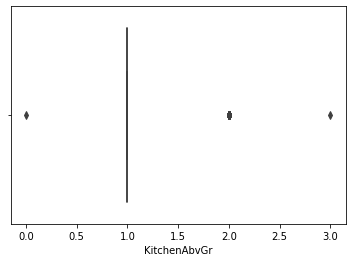

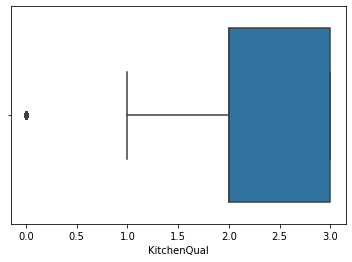

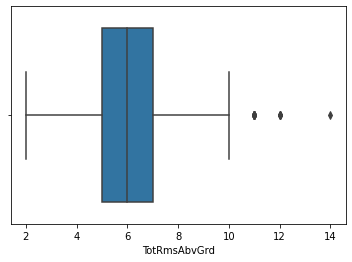

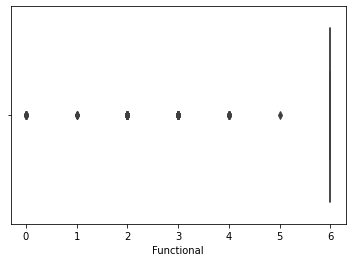

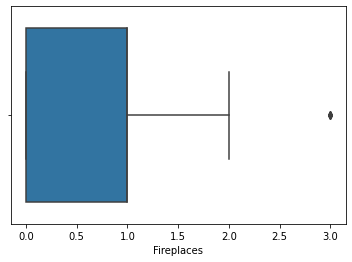

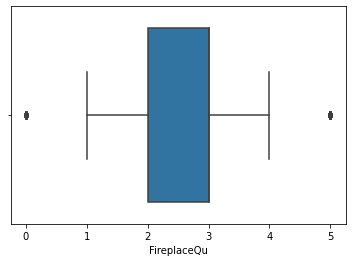

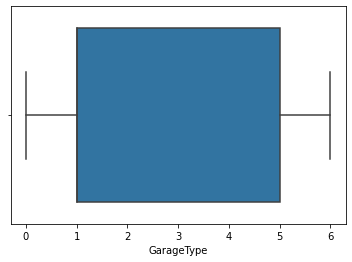

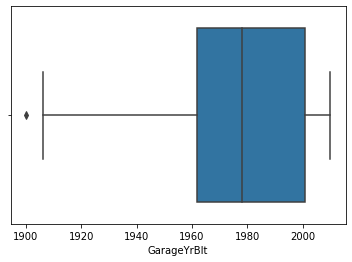

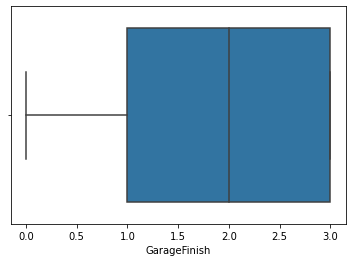

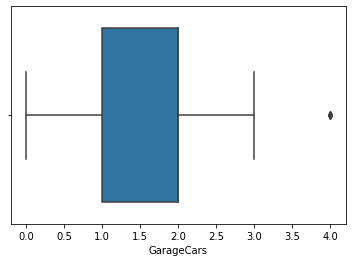

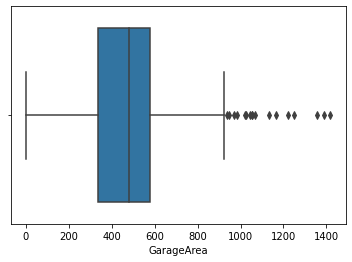

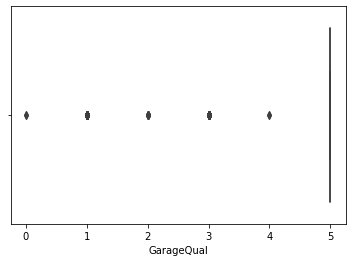

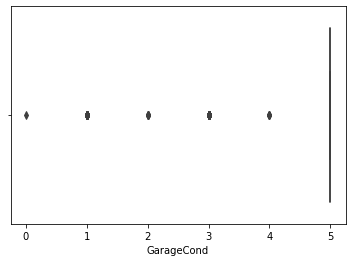

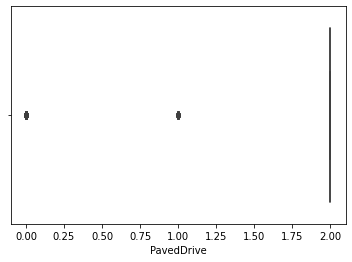

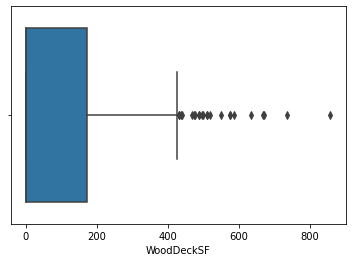

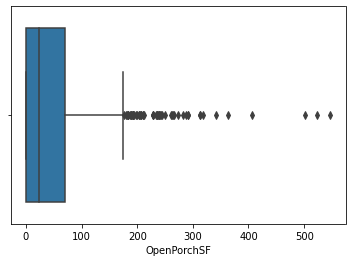

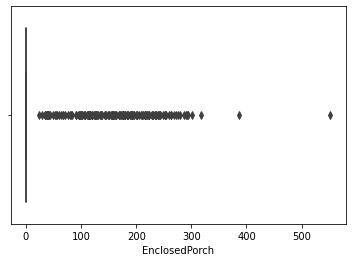

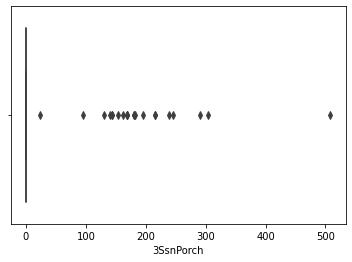

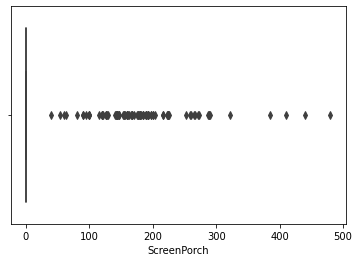

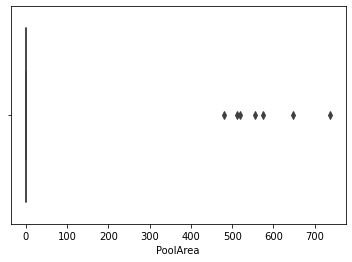

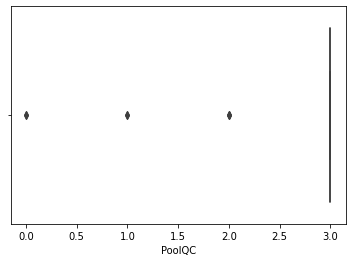

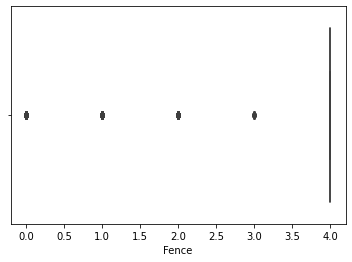

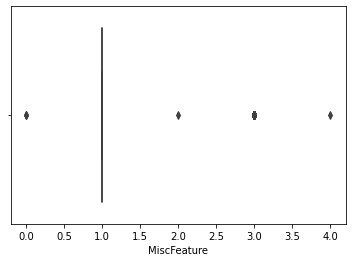

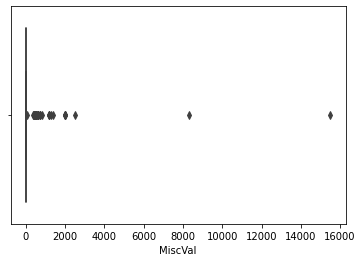

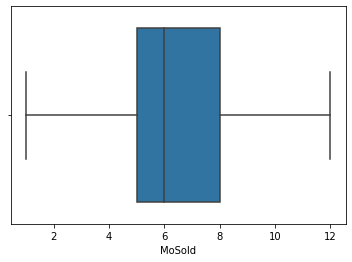

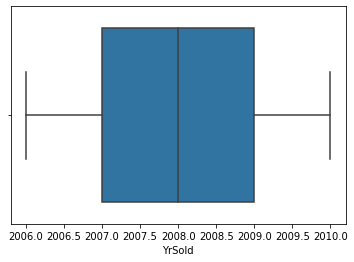

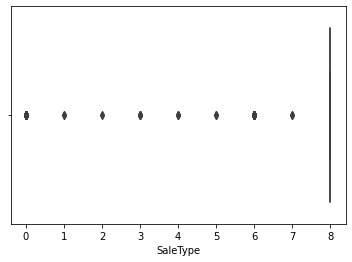

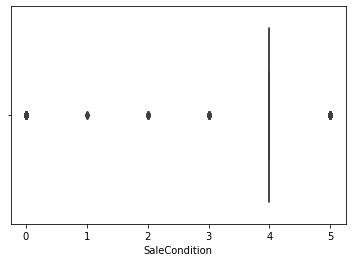

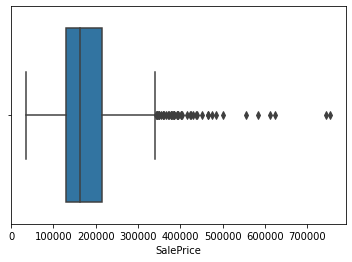

In [271]:
columns =['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']
        
for i in df_train[columns]:
    plt.figure()
    sns.boxplot(df_train[i])

Observation: sum of the variable contains the outliers need to treat them

In [272]:
#Spliting the data
x = df_train.drop(['SalePrice'],axis=1)
y = df_train['SalePrice']

In [273]:

# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Identified outliers: 81
Non-outlier observations: 9919


In [274]:
outliers_removed = x

In [275]:
# creating train test splits
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)

In [276]:
# summarize the shape of the updated training dataset
print(x_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(x_train, y_train)
# evaluate the model
yhat = model.predict(x_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(876, 80) (876,)
MAE: 23293.601


In [277]:

#importing the libraries 
from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()
Regressor.fit(x_train, y_train)
y_pred = Regressor.predict(x_test)

r_sq = Regressor.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', Regressor.intercept_)
print('coefficients:', Regressor.coef_)

coefficient of determination: 0.8231007600680814
intercept: 2662066.9301827988
coefficients: [-2.83553992e+00 -1.32311567e+02 -7.05922131e+02 -1.63474290e+02
  3.73739142e-01  1.67137081e+04  3.98135407e+03 -1.12343842e+03
  2.81382325e+03 -8.81527740e-10  4.98811099e+02 -9.69918294e+02
  1.80455279e+02  1.54025376e+02  3.12939482e+03 -2.86548245e+03
 -1.00229112e+03  1.05019002e+04  3.72327820e+03  1.34406766e+02
  7.58520825e+01  2.04097616e+03  7.63637544e+03 -1.33184437e+03
  3.29876242e+02  6.97616240e+03  4.25293313e+01 -1.25458159e+04
 -3.12316683e+02  1.18570768e+03 -3.49697046e+03  1.73908159e+03
 -3.68380422e+03 -1.08364535e+03  2.25170226e+00  1.30126482e+03
  1.39362324e-01 -4.43552088e+00 -2.04445630e+00 -1.33738396e+03
 -1.10858547e+02  3.51628387e+03 -5.89786495e+02  1.95861473e+01
  1.23908402e+01 -3.37719675e-01  3.16392678e+01  1.02485909e+04
  6.61378435e+02  7.67121032e+03 -8.78691638e+02 -2.81793504e+03
 -1.66476710e+04 -8.03828447e+03  2.92151428e+03  3.07276851e+

In [278]:

Model = []
MMSE=[]
MSE=[]
RMSE=[]
R_Square=[]
from sklearn.metrics import confusion_matrix,classification_report

# calculate MAE, MSE, RMSE
print("MAE  : ",metrics.mean_absolute_error(y_test, y_pred))
print("MSE  : ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Model.append('Linear Regression')
R_Square.append(r_sq)
r_sq = Regressor.score(x, y)
MMSE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE  :  23293.601164993124
MSE  :  1823086992.1879416
RMSE :  42697.6227931713


In [279]:
# SVR model 
from sklearn.svm import LinearSVR
model_SVR = LinearSVR()

model_SVR.fit(x_train, y_train)
yhat_SVR = model_SVR.predict(x_test)

print('Predicted: %s' % yhat_SVR)

Model.append('SVRRegressor')
R_Square.append(r_sq)
MMSE.append(metrics.mean_absolute_error(y_test, yhat_SVR))
MSE.append(metrics.mean_squared_error(y_test, yhat_SVR))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, yhat_SVR)))

Predicted: [152609.39673014 128684.80652091  75468.37071919 147810.05438301
 154031.89764501 205323.99632473 127532.1603637  141287.42769654
 145140.32772012 113777.58582234 152670.84927507 273685.03178281
 147873.88795418 229240.07213819 135330.156148   227333.52835344
 207880.60010936 134939.8151873  196350.90891014 150643.06645865
 207930.12086929 133309.48152139 249798.23352604 170461.42817759
 178316.32911549 201759.4698687  200021.99382376 145812.6461298
 197472.37541467 316724.2239266  129112.49315459 178830.68864957
 156297.94121614  92956.62504243 151163.39776595 186960.74992425
 107895.47370718 253826.0245928  155607.60579035 191976.62039453
 306979.53393965 274182.18415142 191302.72931738 153803.06525415
  99863.92705537 166955.1283634  109452.47479307  90415.80903518
 134616.44824579 293832.75958805 187007.1294748   54915.02857642
 238220.24873098 149212.94211689 108069.43151466 341348.3728025
 166455.54344616 124630.34563795 122159.17099286 258703.42417
 160714.22964217 22

In [280]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 10, random_state = 0)
RFR.fit(x_train, y_train)
y_predRFR =RFR.predict(x_test)


# calculate MAE, MSE, RMSE
print("MAE  : ",metrics.mean_absolute_error(y_test, y_predRFR))
print("MSE  : ", metrics.mean_squared_error(y_test, y_predRFR))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test, y_predRFR)))

Model.append('RandomForestRegressor')
R_Square.append(r_sq)
MMSE.append(metrics.mean_absolute_error(y_test, y_predRFR))
MSE.append(metrics.mean_squared_error(y_test, y_predRFR))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_predRFR)))

MAE  :  20436.11575342466
MSE  :  1296862540.3367808
RMSE :  36011.97773431474


In [281]:
AccuracyTable=pd.DataFrame({'Model':Model,
                        'MMSE':MMSE,
                        'MSE': MSE, 
                        'RMSE': RMSE,
                      
                       })
AccuracyTable

Model          MMSE           MSE          RMSE
0      Linear Regression  23293.601165  1.823087e+09  42697.622793
1           SVRRegressor  26254.390401  2.001781e+09  44741.268747
2  RandomForestRegressor  20436.115753  1.296863e+09  36011.977734

In [282]:
pd.DataFrame(model_SVR.predict(df_test), columns = ['SalePrice']).to_excel("Predicted_house_SalePrice.xlsx", index = True)

In [283]:
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(model_SVR, 'model_SVR.pkl')
  
# Load the model from the file
SVR_joblib = joblib.load('model_SVR.pkl') 
  
# Use the loaded model to make predictions
#SVR_joblib.predict(x_test)

In [284]:
"""CONCLUSION 
•	Key Findings and Conclusions of the Study
1. Which variables are important to predict the price of variable?

Answer: Top 10 variable that very important to predict the price of the house 
OverallQual , GrLivArea, GarageCars, GarageArea, TotalBsmtSF, IstFlSF, FullBath TotalRmsAbvGrd yearbuilt , yearRemodAdd 
2.  How do these variables describe the price of the house?
Overall quality of the House Have very positive relation 78% with the SalePrice, If Any House or building wall, roof, basement floor any damaged or quality of material is not used to built the house and which not 100% safe for living ,Then overall quality of the house will reduce, if overall quality reduce then price of the house will reduce**

Explanatory variable GRLivArea have postivie relation 70% with the dependent variable saleprice of the house, Most of the people likes to spend more time in living area and they wants living area & Garden species, if any houses have wide living area and garden sales price of the house will increases
 
 Most of the western countries have houses with attached garages most of the times winter seasons they won't spend much time in out sides the house they wants to do there any work or build or do hard ware work and they also use to park their vehicle inside the garage if park outside the use in winter seasons vehicle won't starts they use the garage car parking, some of them use as store room**

Total basement square feet also have positive relation sales price , if the house have the basement square feet is more then house building will bigger then area of the house will be more then any change in basement area it will change the sale price of the house

 Independent variables OverallQual , GrLivArea, GarageCars, GarageArea, TotalBsmtSF, IstFlSF, FullBath TotalRmsAbvGrd yearbuilt any changes in these variables change in dependent variable SalePrice

 


Negative relation with Dependent variable
PoolQC
...
 

Observations:
o	Highest number of houses have overall normal sale condition, and those houses have Average overall quality 

o	We observed which house style is one story those house have CBlock foundation and 2 story house those have the Pconc Foundations 
o	One story and 2 story houses have a highest number of the gable roof style


o	There are two types of classification in street type 
Gravel
Paved
o	Highest number of houses connected to paved street 
o	There are two types Alley Gravel and paved alley and most of the house not have alley
o	Highest number of properties have Regular shape and 2nd highest is slightly irregular shape 
o	Highest number of property land near to flat level
o	Near to the house all are public utilities 
o	Highest number of properties have inside lot configuration
o	highest number of properties have gentle slope 
o	Highest number of property sale zoning classification is "Residential low density and Residential Medium density"
o	Highest number of housing in NWAme(Northwest Ames)
o	Highest number of property Proximity to various conditions is Normal
o	Most of the property have build type is 1Fam(Single-Family Detached)
o	Most of the house have 1Story and 2story House style
o	Highest number of houses have overall normal sale condition, and those houses have Average overall quality 
o	
o	Majority of House quality is average and above average 
o	Majority of house condition is average and below average
o	Majority of house have the Gable type of roof
o	Most of the house roof used CompShg(Standard composite shingle)  material used 
o	Majority used Vinly Siding for Exterior covering on house 
o	Majority of Masonry veneer type house used brick face
o	Majority of the house quality of the material on the exterior typical and average
o	Majority of the houses foundation type is Cinder Clock (Cblock) or Poured Concrete(PConc)
o	Majority of houses have 90-99 inches basement and 80 -89 inches average basements
o	Highest number of houses basement condition is average and typical 
o	Majority of the Houses NO basement exposer garden level walls
o	Most of the house basement finished area is unfinished and good living quarters
o	Highest number of houses have heating quality and condition is Excellent
o	Some of the houses do not have central air conditioning
o	Highest number of houses kitchen quality is average 
o	Majority of the house have attached Garage 
o	Describe the key findings, inferences, observations from the whole problem. """


'CONCLUSION \n•\tKey Findings and Conclusions of the Study\n1. Which variables are important to predict the price of variable?\n\nAnswer: Top 10 variable that very important to predict the price of the house \nOverallQual , GrLivArea, GarageCars, GarageArea, TotalBsmtSF, IstFlSF, FullBath TotalRmsAbvGrd yearbuilt , yearRemodAdd \n2.  How do these variables describe the price of the house?\nOverall quality of the House Have very positive relation 78% with the SalePrice, If Any House or building wall, roof, basement floor any damaged or quality of material is not used to built the house and which not 100% safe for living ,Then overall quality of the house will reduce, if overall quality reduce then price of the house will reduce**\n\nExplanatory variable GRLivArea have postivie relation 70% with the dependent variable saleprice of the house, Most of the people likes to spend more time in living area and they wants living area & Garden species, if any houses have wide living area and gard